# **HW5 (20 Points): Required Submissions:**
1.  Submit  colab/jupyter notebooks.
2. There are two Questions with different datasets.
3. **You do not need to do EDA again. You can use the EDA from last HW. We are using the same datasets as in the last HW.**

2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided).
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw5, FirstName_file2_h5, FirstName_file3_h5, FirstName_file4_h5**

# Question1 (10 Points) : Classification on the ‘credit-g’ dataset using Logistic regression.

Compare KNN (last HW), Logistic Regression. Based on your anaysis which algorithm you will recommend.

# Download Data:
You can download the dataset using the commands below  and see it’s description at https://www.openml.org/d/31

### Attribute description from https://www.openml.org/d/31

1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [2]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q
  from google.colab import drive
  drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.6 MB/s eta 0:00:00
Mounted at /content/drive


In [3]:
import feature_engine
import sklearn

In [4]:
print(feature_engine.__version__)
print(sklearn.__version__)

1.6.2
1.3.1


In [124]:
# Import packages for data manipulation and mathematical operations
import pandas as pd  # For data manipulation using dataframes
import numpy as np  # For mathematical operations

# Import packages for data visualization
import matplotlib.pyplot as plt  # For basic plots
import seaborn as sns  # For more advanced plots
import scipy.stats as stats  # For statistical tests and transformations
import statsmodels.api as sm
# To display plots inline in Jupyter Notebooks
%matplotlib inline

# Import packages for saving and loading machine learning models
import joblib  # To save and load ML models

# Import packages for file and system operations
from pathlib import Path  # For OS-agnostic file paths
import sys  # For system-specific parameters and functions

# Import packages for data splitting and model evaluation
from sklearn.model_selection import train_test_split  # For data splitting
from sklearn.model_selection import StratifiedKFold  # For stratified cross-validation
from sklearn.model_selection import KFold  # For simple cross-validation
from sklearn.model_selection import StratifiedShuffleSplit

# Import packages for data preprocessing
from feature_engine.encoding import OneHotEncoder  # For one-hot encoding categorical variables
from feature_engine.encoding import RareLabelEncoder  # For encoding rare labels
from sklearn.preprocessing import StandardScaler  # For standardizing numerical variables

# Import packages for building pipelines
from sklearn.pipeline import Pipeline  # For creating pipelines

# Import packages for hyperparameter tuning
from sklearn.model_selection import GridSearchCV  # For grid search cross-validation

# Import packages for machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classification

# Import packages for fetching datasets
from sklearn.datasets import fetch_openml  # To fetch datasets from OpenML

# Import packages for feature transformations
from feature_engine.transformation import LogTransformer  # For logarithmic transformations
from feature_engine.wrappers import SklearnTransformerWrapper  # To use scikit-learn transformers within feature-engine

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

from feature_engine.selection import DropFeatures
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [6]:
base_folder = Path('/content/drive/MyDrive/BUAN6341/HW5') # CHANGE TO LOCATION BASED ON YOUR GOOGLE DRIVE- chnage the path after MyDrive

In [7]:
# CHANGE TO LOCATION BASED ON YOUR GOOGLE DRIVE
save_model_folder = base_folder/'models/machine_learning' # CHANGE TO LOCATION WHERE YOU ARE PLANNING TO DSAVE MODELS
custom_function_folder = base_folder/'custom-functions' # CHANGE TO LOCATION WHERE YOU SAVED eda_pots.py
save_model_folder.mkdir(exist_ok=True, parents=True)

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
sys.path.append(str(custom_function_folder))

In [10]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/BUAN6341/HW5/custom-functions']

In [11]:
from  plot_learning_curve import plot_learning_curve

In [12]:
from eda_plots import diagnostic_plots, plot_target_by_category

In [13]:
from sklearn.datasets import fetch_openml

In [14]:
# Load data from  https://www.openml.org/d/31
X, y = fetch_openml("credit-g", version=1, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [15]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [16]:
y.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): ['bad', 'good']

In [17]:
# CODE HERE
X.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
5,no checking,36.0,existing paid,education,9055.0,no known savings,1<=X<4,2.0,male single,none,4.0,no known property,35.0,none,for free,1.0,unskilled resident,2.0,yes,yes
6,no checking,24.0,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3.0,male single,none,4.0,life insurance,53.0,none,own,1.0,skilled,1.0,none,yes
7,0<=X<200,36.0,existing paid,used car,6948.0,<100,1<=X<4,2.0,male single,none,2.0,car,35.0,none,rent,1.0,high qualif/self emp/mgmt,1.0,yes,yes
8,no checking,12.0,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2.0,male div/sep,none,4.0,real estate,61.0,none,own,1.0,unskilled resident,1.0,none,yes
9,0<=X<200,30.0,critical/other existing credit,new car,5234.0,<100,unemployed,4.0,male mar/wid,none,2.0,car,28.0,none,own,2.0,high qualif/self emp/mgmt,1.0,none,yes


In [18]:
y.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): ['bad', 'good']

In [19]:
# CODE HERE
X.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [21]:
# CODE HERE
X.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
dtype: int64

In [22]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [23]:
# CODE HERE
duplicates = X.duplicated()

print(duplicates.any())

print(X[duplicates])

False
Empty DataFrame
Columns: [checking_status, duration, credit_history, purpose, credit_amount, savings_status, employment, installment_commitment, personal_status, other_parties, residence_since, property_magnitude, age, other_payment_plans, housing, existing_credits, job, num_dependents, own_telephone, foreign_worker]
Index: []


In [24]:
# CODE HERE

X.isnull().any()

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
dtype: bool

In [25]:
X.isnull().mean() * 100

checking_status           0.0
duration                  0.0
credit_history            0.0
purpose                   0.0
credit_amount             0.0
savings_status            0.0
employment                0.0
installment_commitment    0.0
personal_status           0.0
other_parties             0.0
residence_since           0.0
property_magnitude        0.0
age                       0.0
other_payment_plans       0.0
housing                   0.0
existing_credits          0.0
job                       0.0
num_dependents            0.0
own_telephone             0.0
foreign_worker            0.0
dtype: float64

In [26]:
# CODE HERE
categorical = [var for var in X.columns if X[var].dtype.name == 'category']

discrete = [var for var in X.columns if X[var].dtype.name != 'category' and len(X[var].unique()) < 20]

continuous = [var for var in X.columns if X[var].dtype.name != 'category' and var not in discrete]

In [27]:
continuous

['duration', 'credit_amount', 'age']

In [28]:
categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [29]:
discrete

['installment_commitment',
 'residence_since',
 'existing_credits',
 'num_dependents']

In [30]:
# CODE HERE
X[categorical].head()

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes


In [31]:
checking_status_freq = 100 * X['checking_status'].value_counts(normalize = True)
print(checking_status_freq)

no checking    39.4
<0             27.4
0<=X<200       26.9
>=200           6.3
Name: checking_status, dtype: float64


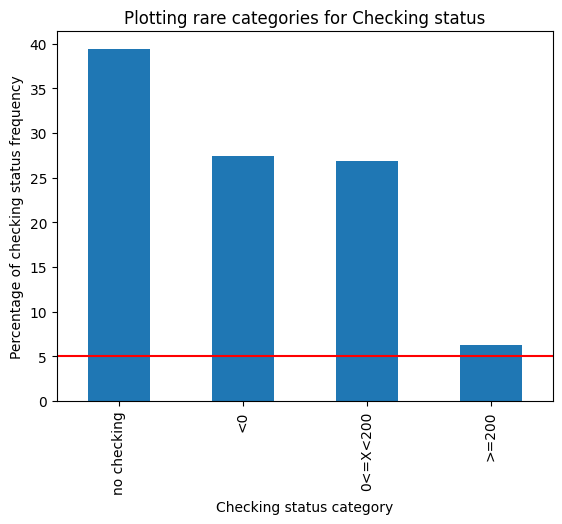

In [32]:
rare_cs_plot = checking_status_freq.sort_values(ascending=False).plot.bar()
rare_cs_plot.axhline(y=5, color='red')
rare_cs_plot.set_ylabel('Percentage of checking status frequency')
rare_cs_plot.set_xlabel('Checking status category')
rare_cs_plot.set_title('Plotting rare categories for Checking status')
plt.show()

In [33]:
def check_rare_categories(df, var):

    frequencies = 100 * df[var].value_counts(normalize=True)

    fig = frequencies.sort_values(ascending=False).plot.bar()

    fig.axhline(y=5, color='red')

    fig.set_ylabel('category percentage frequency')
    fig.set_xlabel(var)
    fig.set_title(f'Identifying Rare Categories for {var}')

    plt.show()

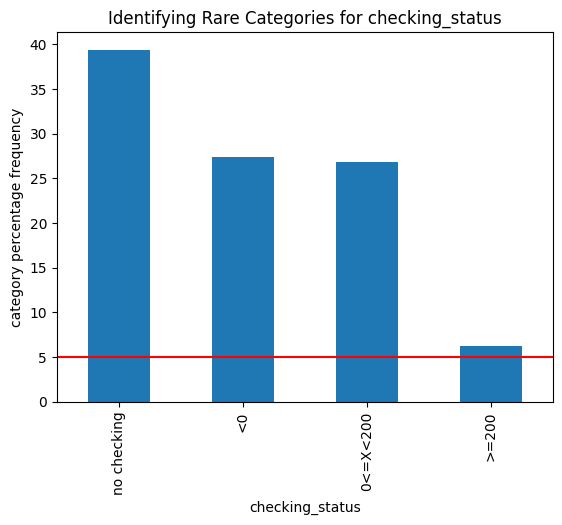

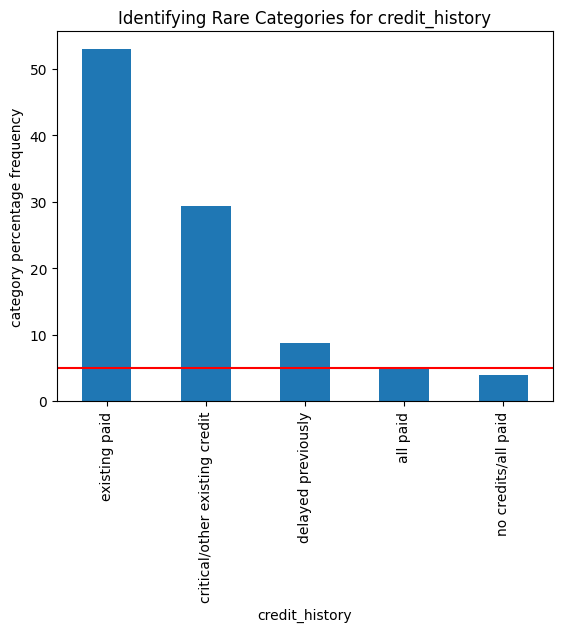

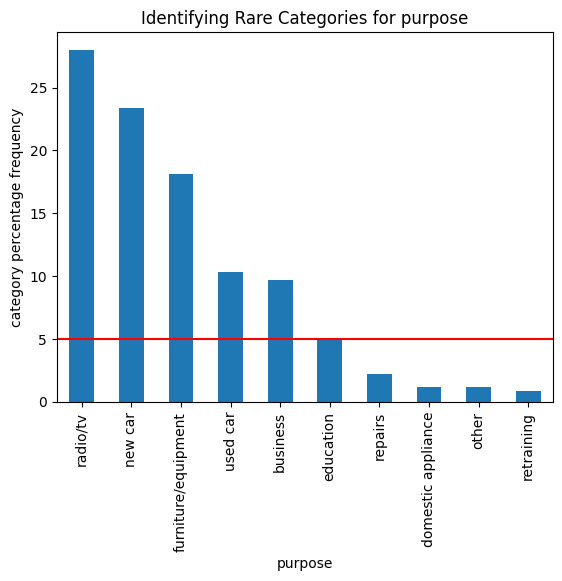

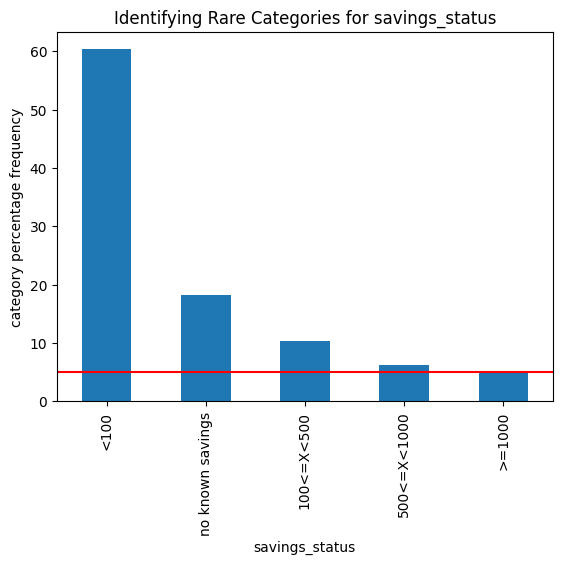

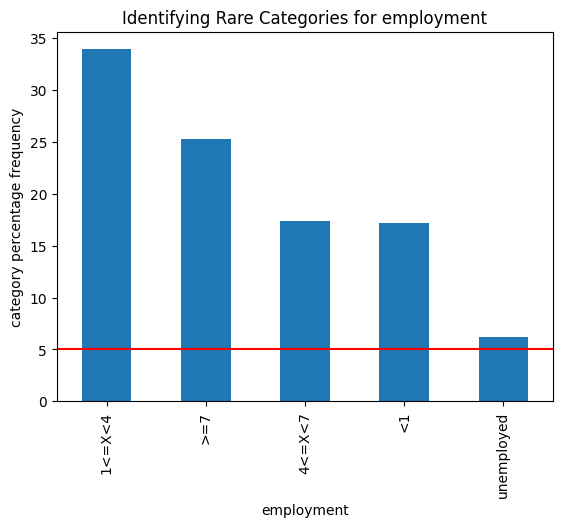

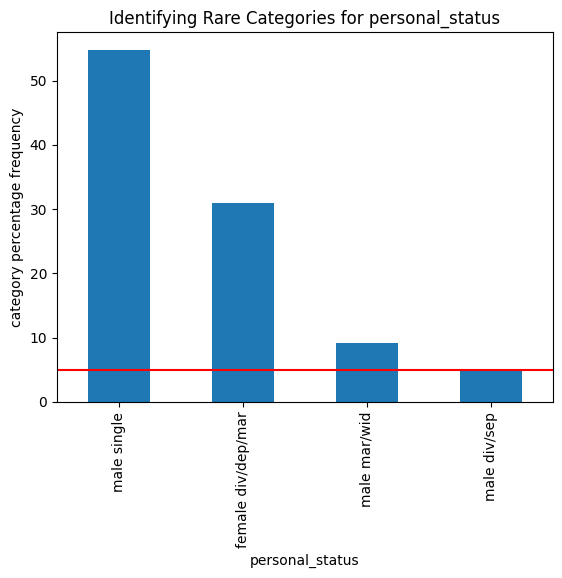

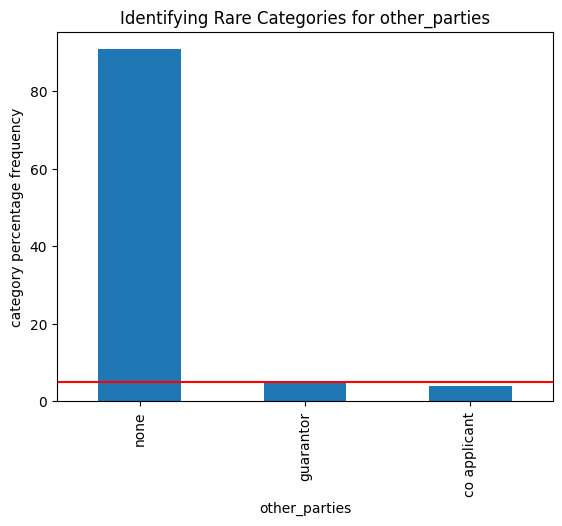

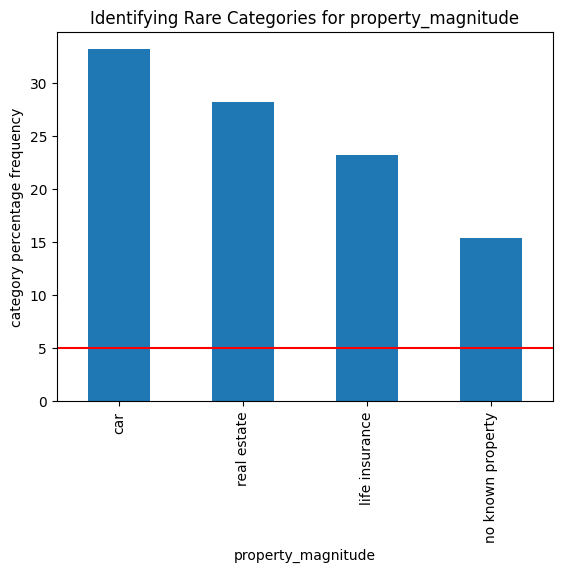

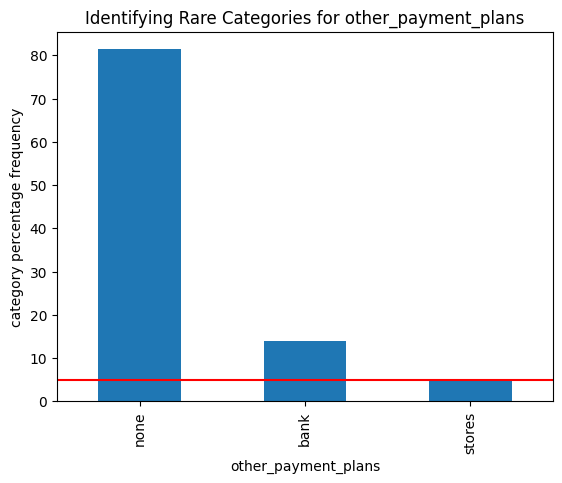

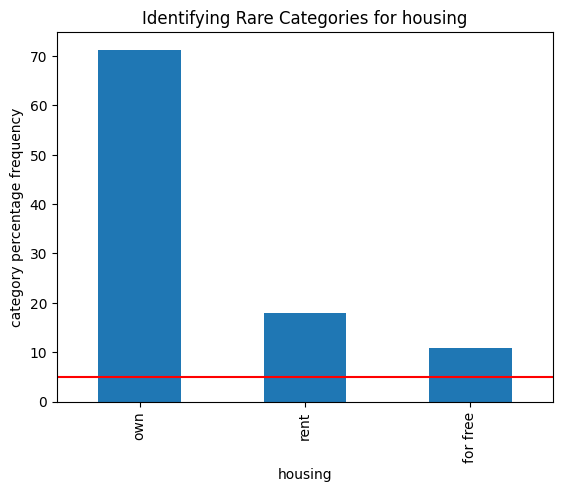

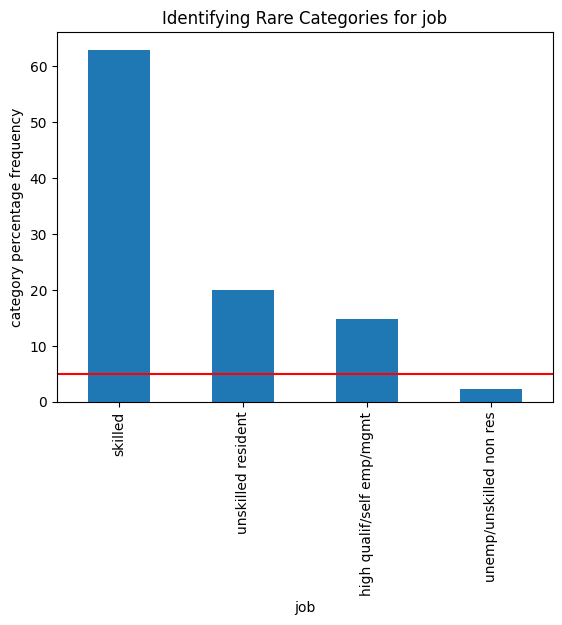

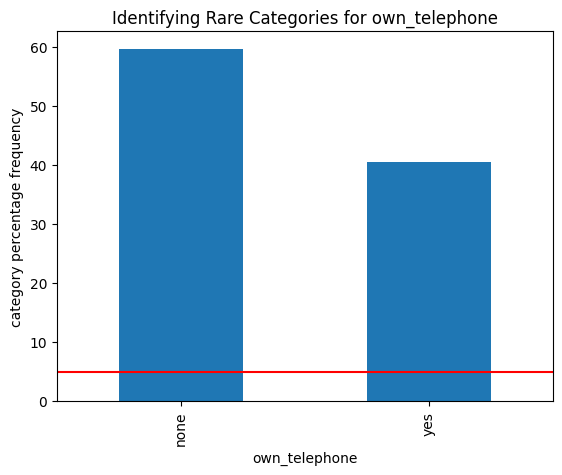

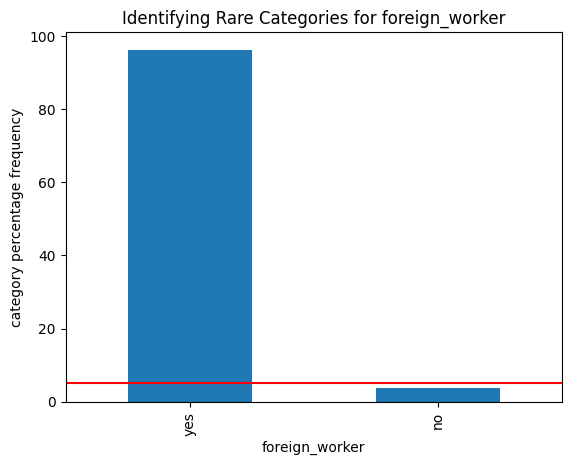

In [34]:
for var in categorical:
  check_rare_categories(X, var)

In [35]:
# CODE HERE
print(y.value_counts())

good    700
bad     300
Name: class, dtype: int64


In [36]:
print(f"{100 * y.value_counts(normalize = True)}")

good    70.0
bad     30.0
Name: class, dtype: float64


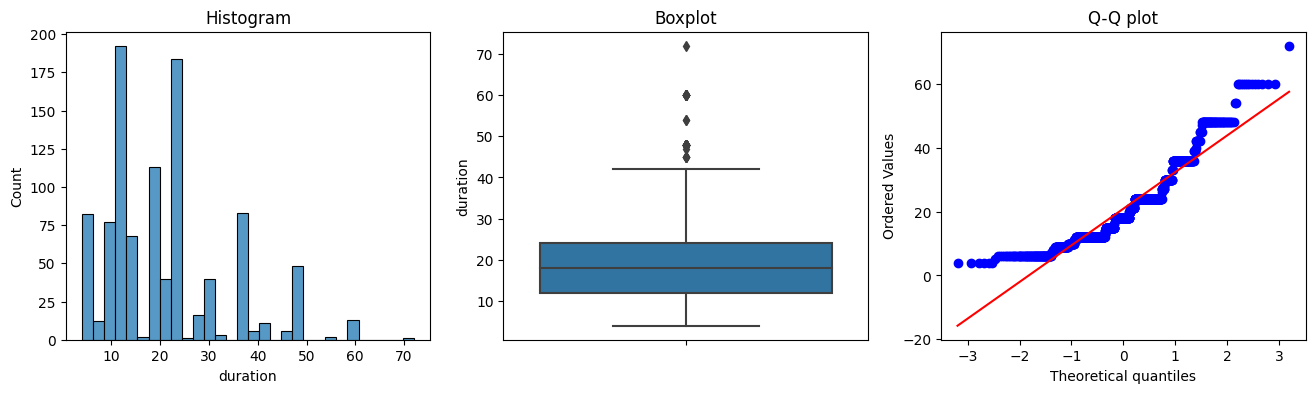

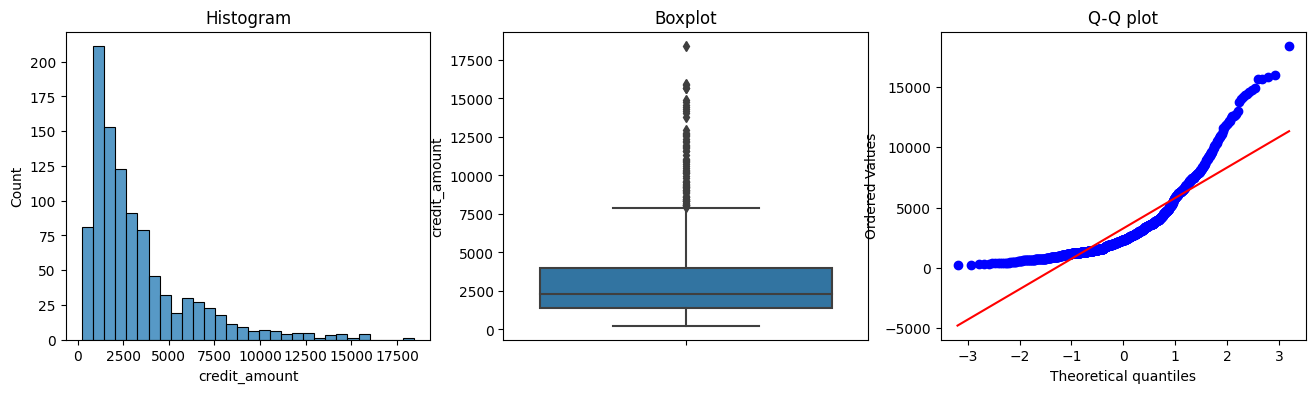

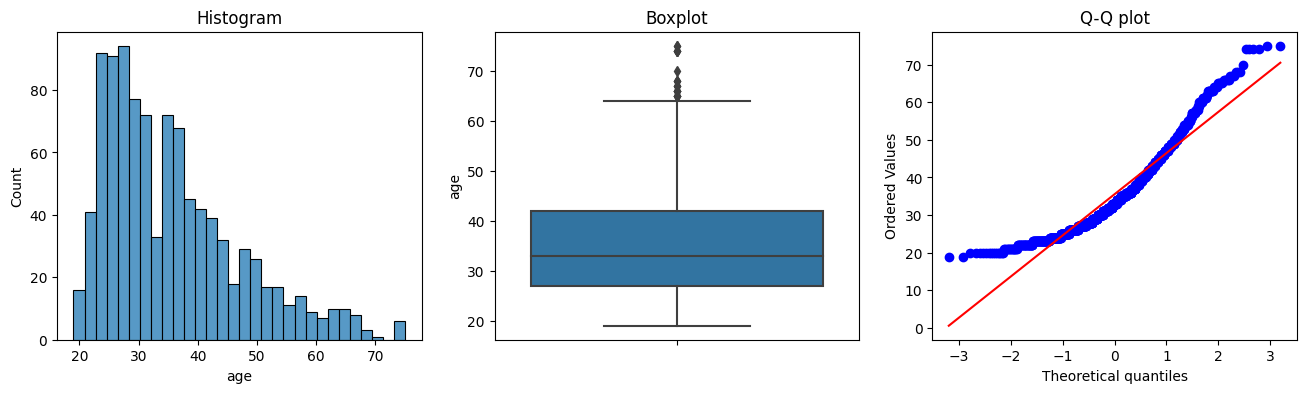

In [37]:
for var in continuous:
    diagnostic_plots(X, var)

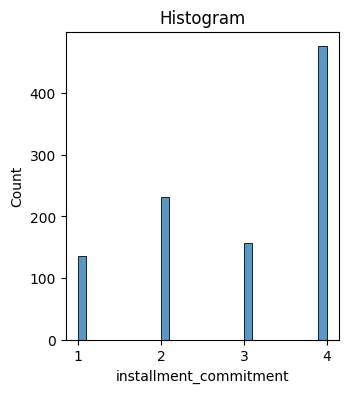

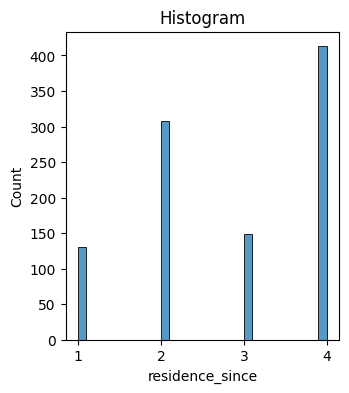

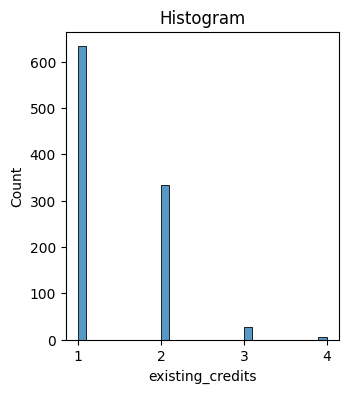

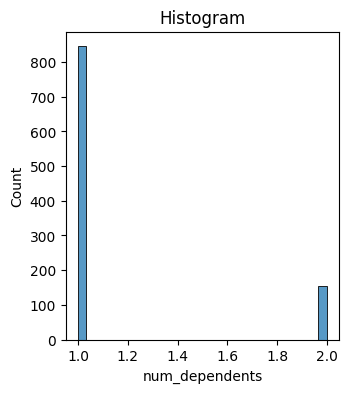

In [38]:
# CODE HERE
for var in discrete:
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 2)
  sns.histplot(X[var], bins = 30)
  plt.title('Histogram')

<Axes: >

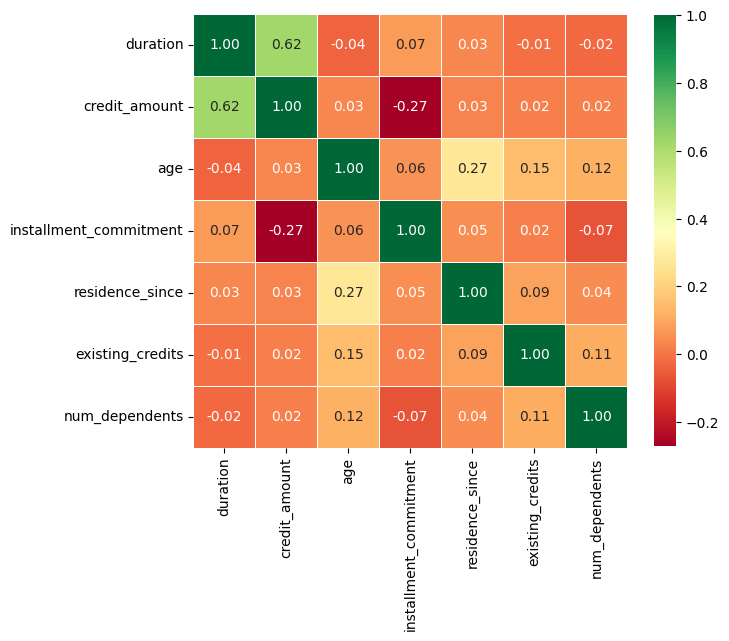

In [39]:
# CODE HERE
correlation_matrix = X[continuous + discrete].corr().round(2)
top_correlation_features = correlation_matrix.index
plt.figure(figsize=(7, 7))
sns.heatmap(X[top_correlation_features].corr(), annot = True, square = True, fmt = '.2f', cbar_kws = {"shrink": .80}, linewidths = .5, cmap = 'RdYlGn')

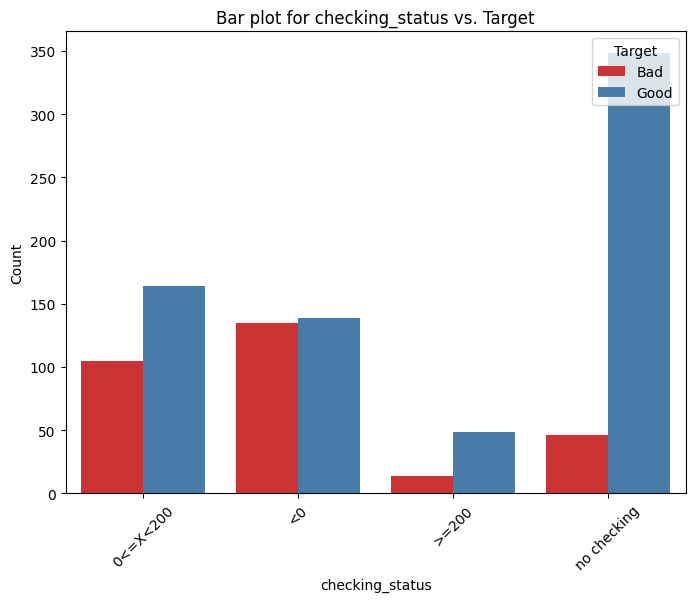

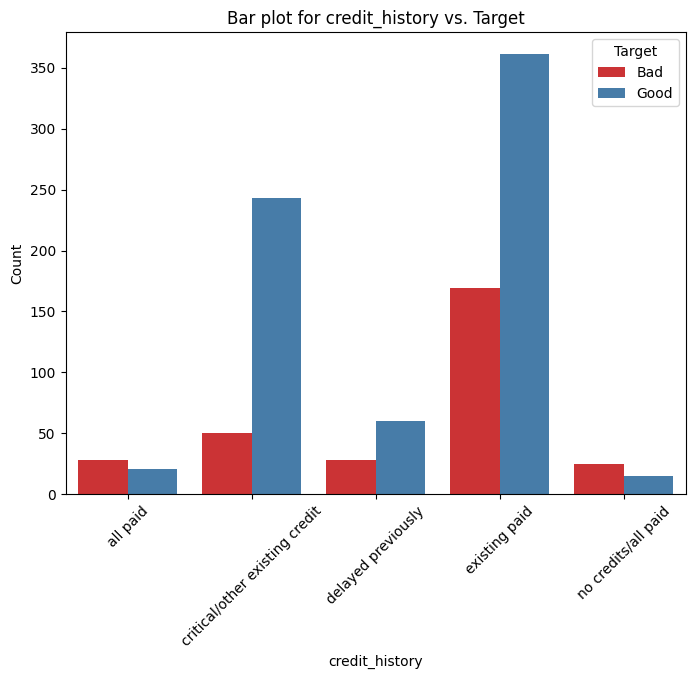

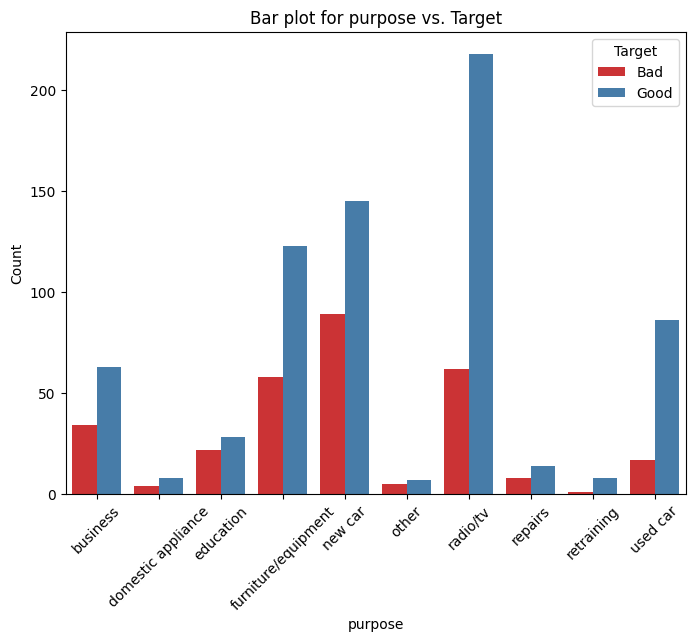

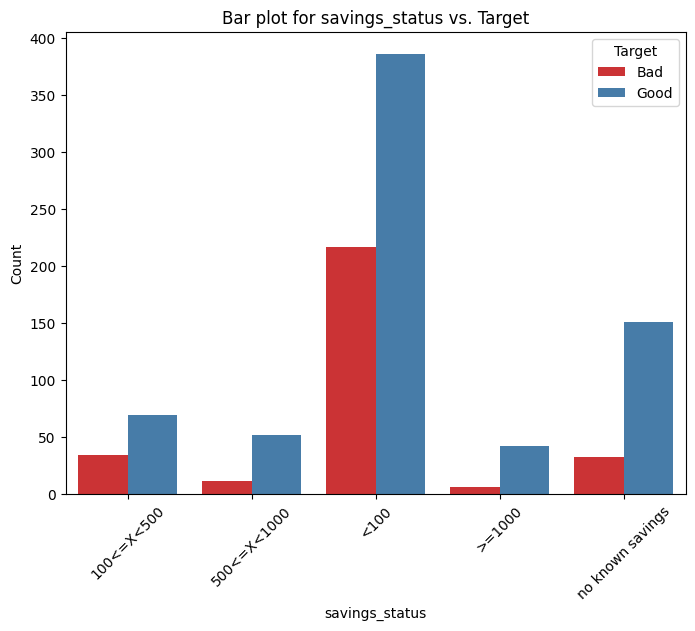

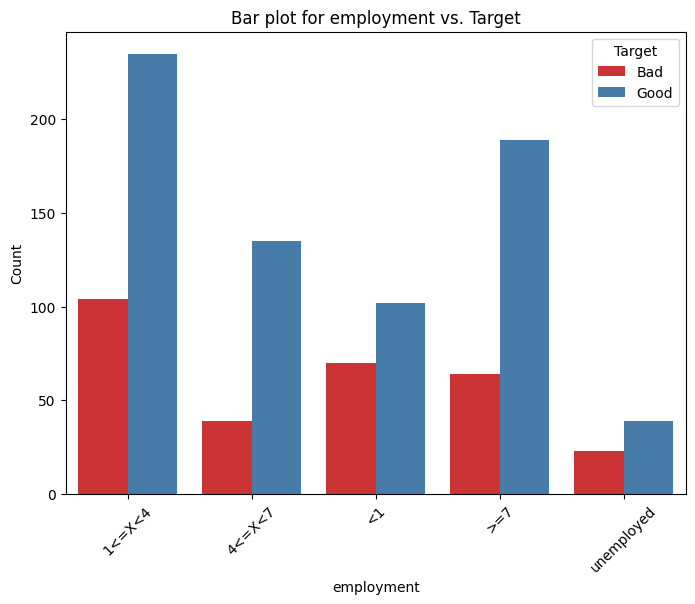

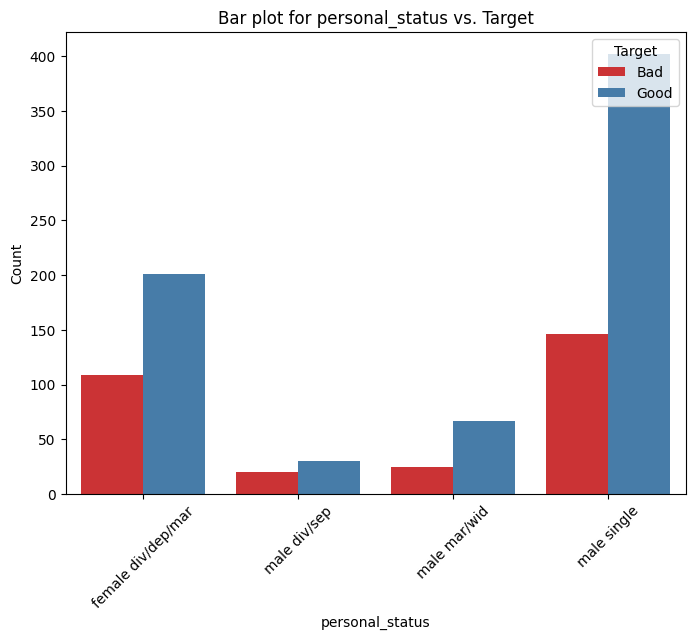

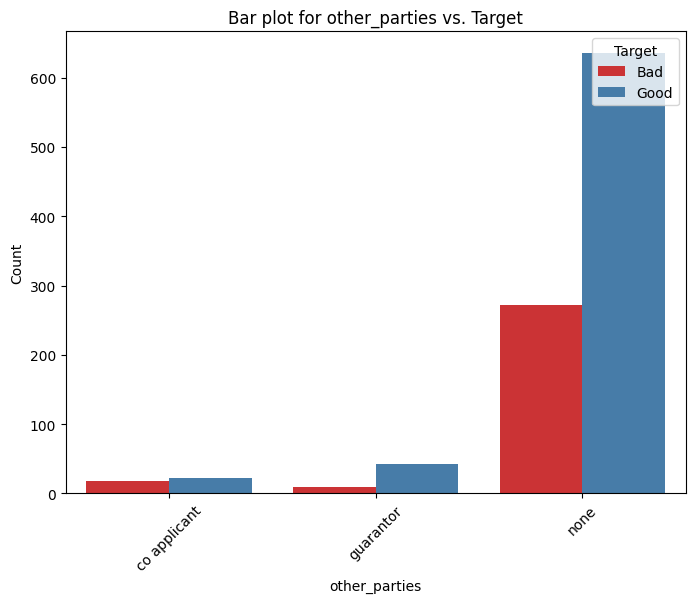

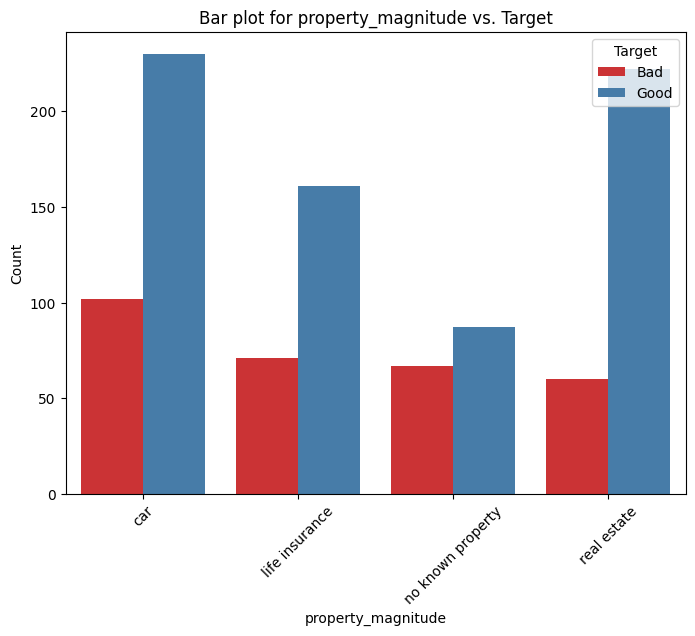

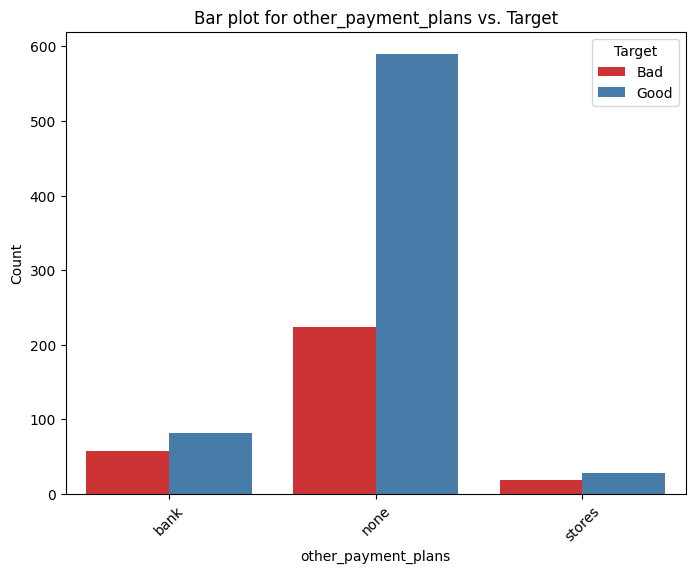

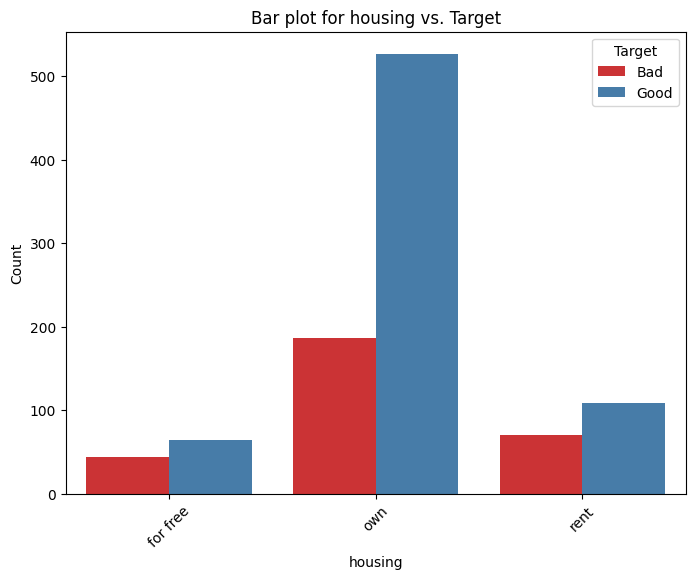

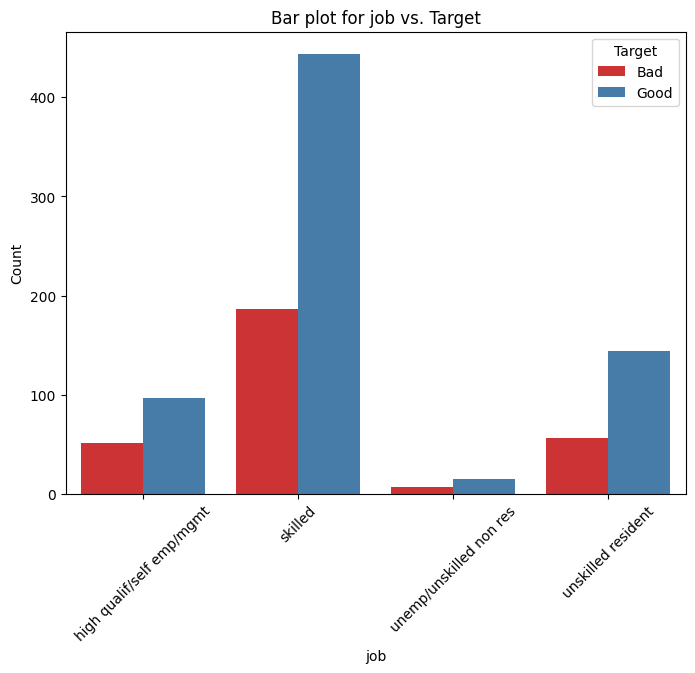

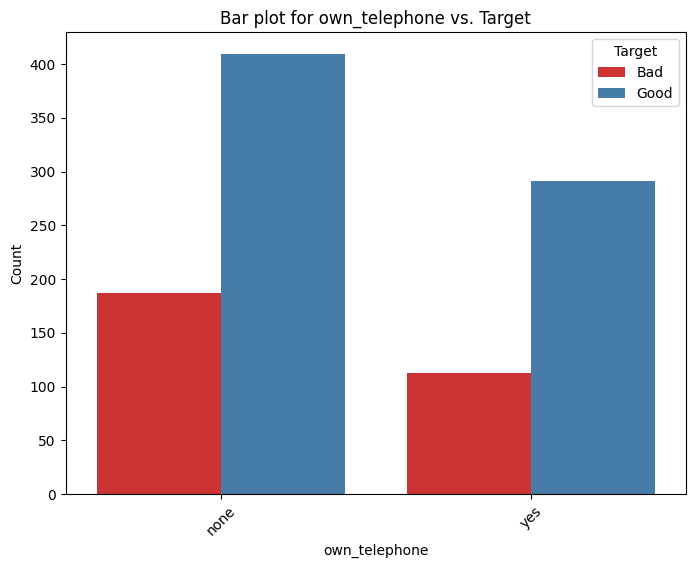

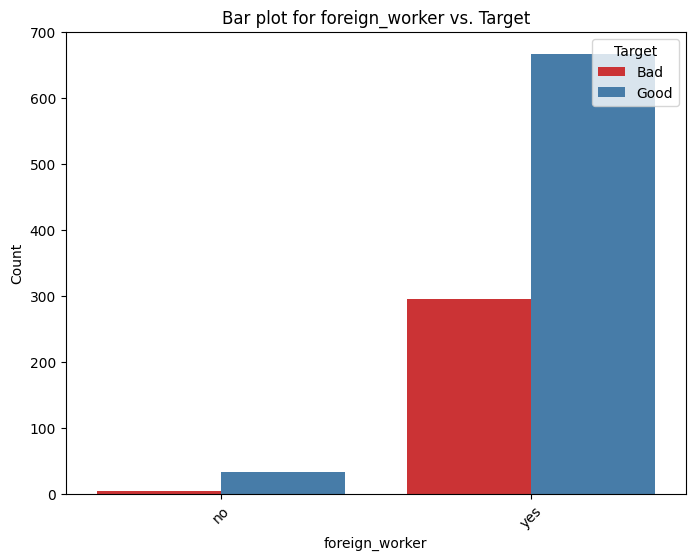

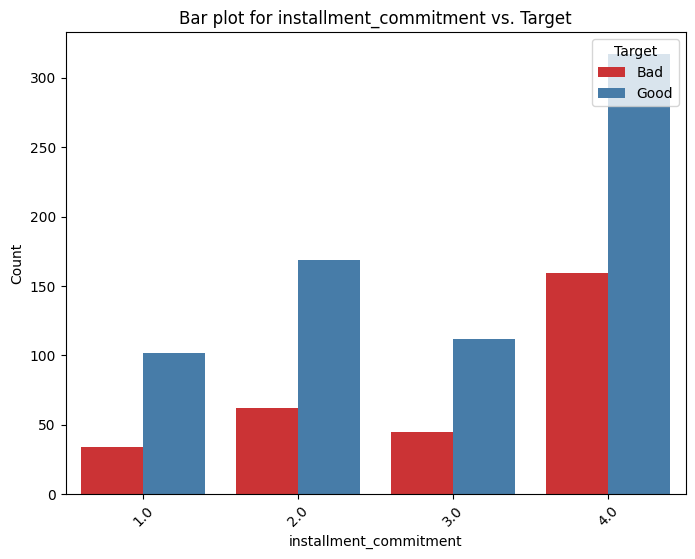

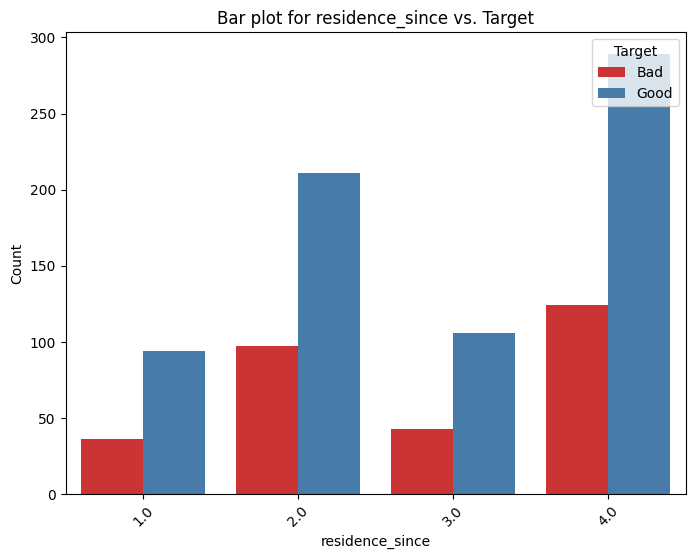

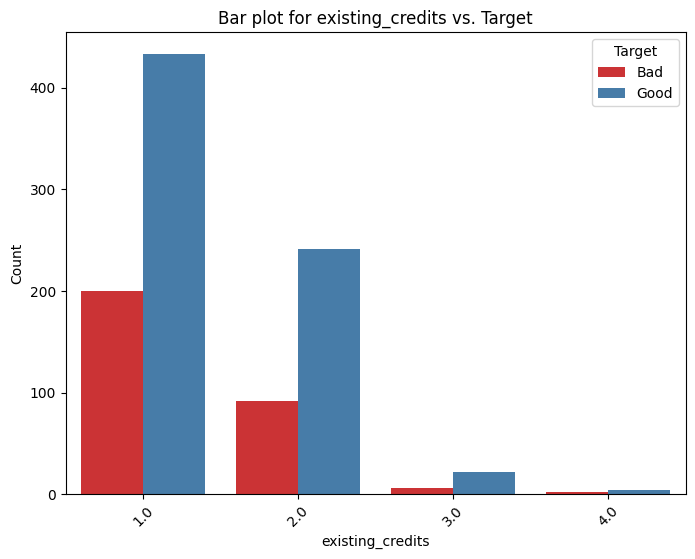

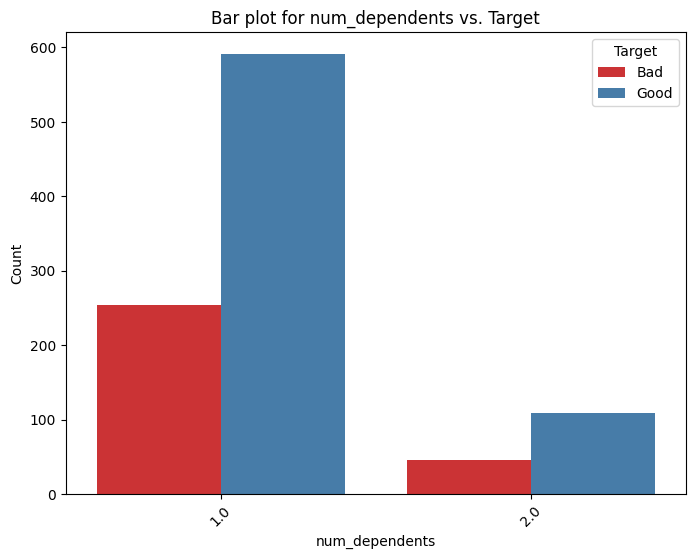

In [40]:
# CODE HERE
for var in categorical + discrete:
  plt.figure(figsize=(8, 6))
  sns.countplot(x = var, hue = y, data = X, palette = "Set1")
  plt.title(f"Bar plot for {var} vs. Target")
  plt.xlabel(var)
  plt.ylabel("Count")
  plt.legend(title = 'Target', loc = 'upper right', labels = ["Bad", "Good"])
  plt.xticks(rotation = 45)
  plt.show()

Conclusions from EDA:

From the above observations we can see that there are no null/missing values in the dataset, and therefore no need to use any kind of Imputation technique.

From the analysis conducted above we can conclude that we don't have any duplicates in our dataset.

We have a few variables with rare categories, credit_history, purpose, job, foreign_worker, in order to solve them, we can try and combine some of the rare categories in those respective variables, and make it one category, and by doing so we will have more values and there won’t be any rare categories.

We can see that, by analyzing the target variables, i.e, class variable, we have a class imbalance problem, where 70% of the data is labelled as ‘good’, and 30% of the data is labelled as ‘bad’. In order to solve this problem we can either upsample or downsample the dataset, or use different evaluation metrics, and use Stratified K-Fold, or Stratied Shuffle and Split as cross validation strategies.

Our continuous variables,’duration’, ‘credit_amount’, and ‘age’, don’t have a normal distribution, all three of them have a skewed distribution. We can use transformation of solve this issue.

Also, our continuous variables, have a lots of outliers, as we can see from the boxplots we have plotted, we can use discretization technique to resolve these outliers.

From out heatmap or correlation matrix we can see that there is a strong positive correlation between duration and credit_amount. And, there is a strong negative correlation between installment_commitment and credit_amount. The correlation matters when you are trying to prove causality, it doesn’t matter much when you are trying to make prediction. However, in some cases there might be some overfitting and in order to solve multicollinearity and high correlation you can consider dropping the highly correlated variables or try and merge them into one.

We can see that, checking_status with no checking has a good credit risk, credit_history of existing paid has a good credit risk. Purpose of radio/tv has a high good credit risk. And someone with saving_status of <100 has a high good credit risk. Someone who is employed for more that 1 year and less than 4 years also has a good credit risk. A single male has a good credit risk. And someone with no other parties has a high good credit risk. Also, someone with no other payment plans has high good credit risk. Also, someone with an own house has a high good credit. Someone who is skilled also have a good credit standing. And some with just 1 dependent has a good credit risk. And someone with less existing credits has a good credit. Finally, someone who is a resident_since 4 years has high chance of good credit.

In [41]:
# before doing any data cleaning step we need to first split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [42]:
X_train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
82,no checking,18.0,existing paid,business,1568.0,100<=X<500,1<=X<4,3.0,female div/dep/mar,none,4.0,life insurance,24.0,none,rent,1.0,unskilled resident,1.0,none,yes
991,no checking,15.0,all paid,radio/tv,1569.0,100<=X<500,>=7,4.0,male single,none,4.0,car,34.0,bank,own,1.0,unskilled resident,2.0,none,yes
789,<0,40.0,critical/other existing credit,education,5998.0,<100,1<=X<4,4.0,male single,none,3.0,no known property,27.0,bank,own,1.0,skilled,1.0,yes,yes
894,no checking,18.0,critical/other existing credit,radio/tv,1169.0,no known savings,1<=X<4,4.0,male single,none,3.0,life insurance,29.0,none,own,2.0,skilled,1.0,yes,yes
398,0<=X<200,12.0,existing paid,new car,1223.0,<100,>=7,1.0,male div/sep,none,1.0,real estate,46.0,none,rent,2.0,skilled,1.0,none,yes


In [43]:
y_train

82     good
991    good
789     bad
894    good
398     bad
       ... 
106     bad
270    good
860    good
435     bad
102    good
Name: class, Length: 750, dtype: category
Categories (2, object): ['bad', 'good']

In [44]:
print(f'Length of X_train: {len(X_train)}')
print(f'Length of X_test: {len(X_test)}')

Length of X_train: 750
Length of X_test: 250


In [45]:
print(f'Length of y_train: {len(y_train)}')
print(f'Length of y_test: {len(y_test)}')

Length of y_train: 750
Length of y_test: 250


In [46]:
var_rare_labels= [
 'credit_history',
 'purpose',
 'savings_status',
 'personal_status',
 'other_parties',
 'other_payment_plans',
 'job',
]

In [47]:
continuous

['duration', 'credit_amount', 'age']

In [48]:
discrete

['installment_commitment',
 'residence_since',
 'existing_credits',
 'num_dependents']

In [49]:
categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
class ConvertToNumpyArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array(X)

### Logistic Regression

In [51]:
pipeline_1 = Pipeline([

    ('rare_label_encoder',
      RareLabelEncoder(tol=0.05, variables=var_rare_labels)),

    ('one_hot_encoder',
     OneHotEncoder(variables=categorical + discrete, drop_last=True, ignore_format=True)),

    ('log_transformer',
     LogTransformer(variables=continuous)),

    ('scalar',
      SklearnTransformerWrapper(StandardScaler(), variables=continuous)),

    ('convert_to_numpy', ConvertToNumpyArray()),

    ('logisticregression',
     LogisticRegression())
])

In [52]:
param_grid_1 = {
   'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
}

random_lr_1 = RandomizedSearchCV(pipeline_1, param_distributions=param_grid_1, cv=5, n_iter=5, return_train_score=True)

In [53]:
random_lr_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable credit_history is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable purpose is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable savings_status is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable personal_status is less than that indicated in n_categories. Thus

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rare_label_encoder',
                                              RareLabelEncoder(variables=['credit_history',
                                                                          'purpose',
                                                                          'savings_status',
                                                                          'personal_status',
                                                                          'other_parties',
                                                                          'other_payment_plans',
                                                                          'job'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(drop_last=True,
                                                            ignore_format=True,
                                                            variables=['checking_status',
                                                                       'credit_history',
                                                                       'purpose',
                                                                       'savings_status',
                                                                       '...
                                              LogTransformer(variables=['duration',
                                                                        'credit_amount',
                                                                        'age'])),
                                             ('scalar',
                                              SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                        variables=['duration',
                                                                                   'credit_amount',
                                                                                   'age'])),
                                             ('convert_to_numpy',
                                              ConvertToNumpyArray()),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   n_iter=5,
                   param_distributions={'logisticregression__C': [0.001, 0.01,
                                                                  0.1, 1, 10]},
                   return_train_score=True)

In [54]:
print(random_lr_1.best_params_)

{'logisticregression__C': 0.1}


In [55]:
file_best_estimator_round1 = save_model_folder / 'lr_round1_best_estimator.pkl'

file_complete_grid_round1 = save_model_folder / 'lr_round1_complete_grid.pkl'

In [56]:
joblib.dump(random_lr_1.best_estimator_, file_best_estimator_round1)

joblib.dump(random_lr_1, file_complete_grid_round1)

['/content/drive/MyDrive/BUAN6341/HW5/models/machine_learning/lr_round1_complete_grid.pkl']

In [57]:
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)

loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

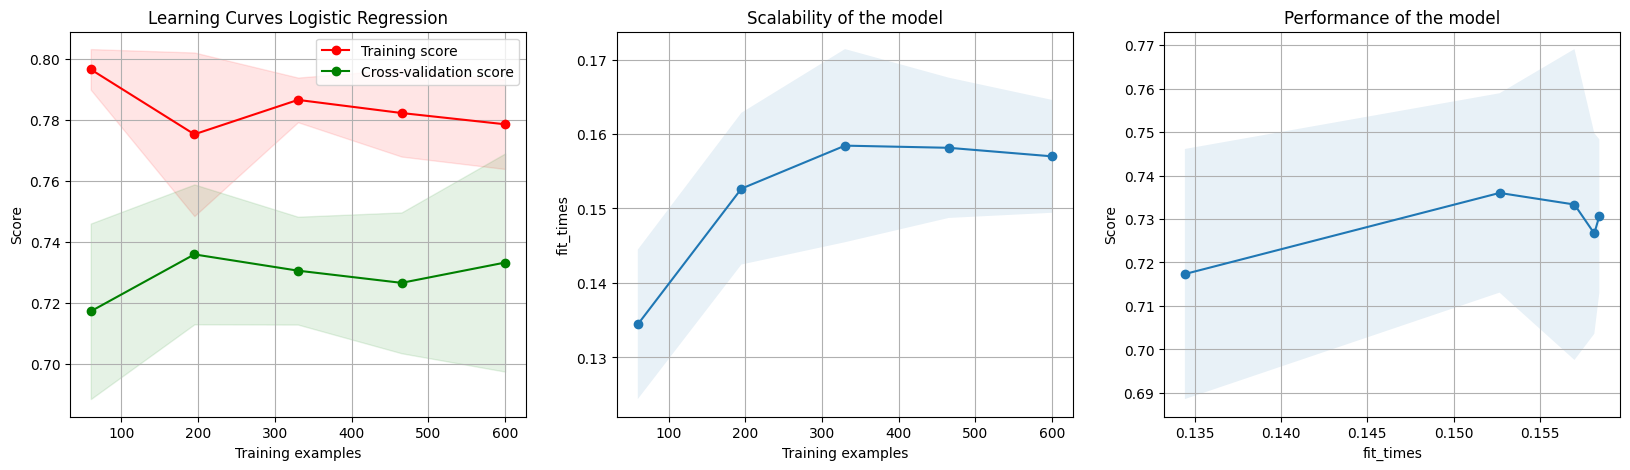

In [58]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves Logistic Regression', X_train, y_train, n_jobs=-1)

In [59]:
print(loaded_best_estimator_round1.score(X_train, y_train))

print(loaded_complete_grid_round1.best_score_)

0.776
0.7333333333333333


In [60]:
param_grid_2 = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
    'logisticregression__solver': ['liblinear', 'saga'],
    'logisticregression__max_iter': [100, 200]
}

random_lr_2 = RandomizedSearchCV(pipeline_1, param_distributions=param_grid_2, cv=5, return_train_score=True)

In [61]:
random_lr_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable credit_history is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable purpose is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable savings_status is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable personal_status is less than that indicated in n_categories. Thus

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rare_label_encoder',
                                              RareLabelEncoder(variables=['credit_history',
                                                                          'purpose',
                                                                          'savings_status',
                                                                          'personal_status',
                                                                          'other_parties',
                                                                          'other_payment_plans',
                                                                          'job'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(drop_last=True,
                                                            ignore_format=True,
                                                            variables=['checking_status',
                                                                       'credit_history',
                                                                       'purpose',
                                                                       'savings_status',
                                                                       '...
                                              SklearnTransformerWrapper(transformer=StandardScaler(),
                                                                        variables=['duration',
                                                                                   'credit_amount',
                                                                                   'age'])),
                                             ('convert_to_numpy',
                                              ConvertToNumpyArray()),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   param_distributions={'logisticregression__C': [0.001, 0.01,
                                                                  0.1, 1, 10],
                                        'logisticregression__max_iter': [100,
                                                                         200],
                                        'logisticregression__solver': ['liblinear',
                                                                       'saga']},
                   return_train_score=True)

In [62]:
print(random_lr_2.best_params_)

{'logisticregression__solver': 'saga', 'logisticregression__max_iter': 200, 'logisticregression__C': 0.1}


In [63]:
file_best_estimator_round2 = save_model_folder / 'lr_round2_best_estimator.pkl'

file_complete_grid_round2 = save_model_folder / 'lr_round2_complete_grid.pkl'

In [64]:
joblib.dump(random_lr_2.best_estimator_, file_best_estimator_round2)

joblib.dump(random_lr_2, file_complete_grid_round2)

['/content/drive/MyDrive/BUAN6341/HW5/models/machine_learning/lr_round2_complete_grid.pkl']

In [65]:
loaded_best_estimator_round2 = joblib.load(file_best_estimator_round2)

loaded_complete_grid_round2 = joblib.load(file_complete_grid_round2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

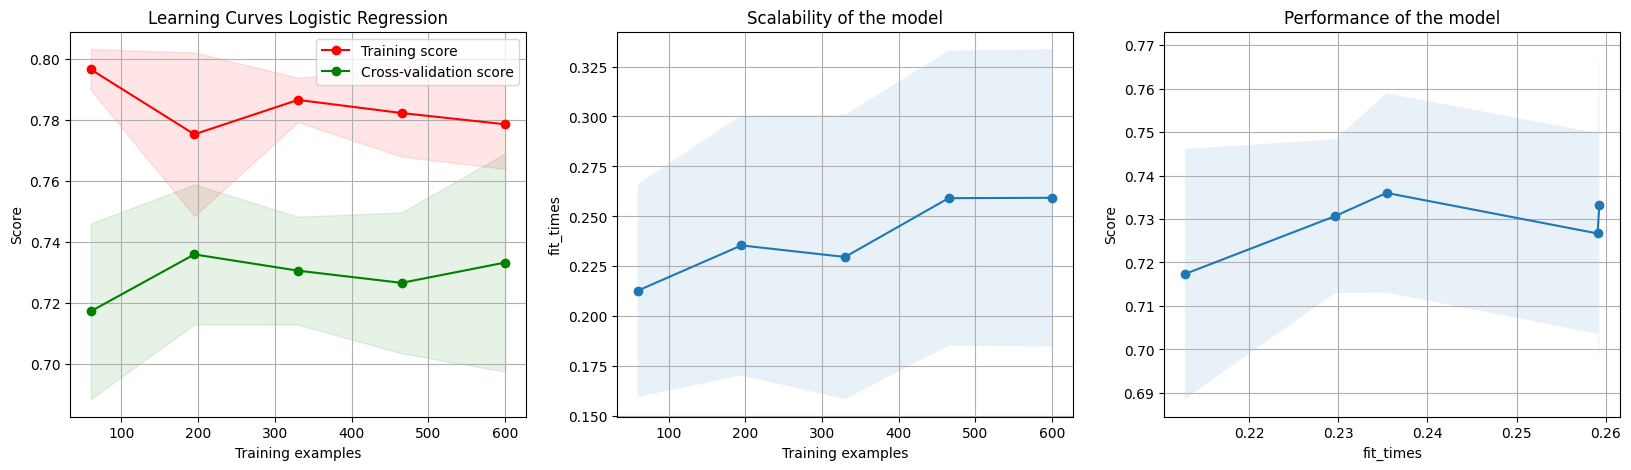

In [66]:
plot_learning_curve(loaded_best_estimator_round2, 'Learning Curves Logistic Regression', X_train, y_train, n_jobs=-1)

In [67]:
print(loaded_best_estimator_round2.score(X_train, y_train))

print(loaded_complete_grid_round2.best_score_)

0.776
0.7333333333333333


When comparing KNN Classifier vs Logistic Regression, seeing the scores, KNN Classification algorithm suffers from much severe overfitting even with hyperparameter tuning, compared to Logistic Regression, where the training and cv scores are 77.6% and 73.4% resp, vs KNN, which gives scores of 80% and 73% training and cv resp, so I would recommend using Logistic Regression with hyperparamter tuning.

# Question2 (7.5 Points) : Linear Regression on Bike Sharing Dataset. OPTIONAL (Try SVM Regression).

- Download the data from following link: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand'



In [68]:
data = pd.read_csv('/content/drive/MyDrive/BUAN6341/HW4/datasets/SeoulBikeData.csv', encoding='latin-1')

In [69]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [70]:
# We are dropping Date, as it not necessary for this dataset

data = data.drop('Date', axis=1)

In [71]:
X = data.iloc[:, 1:]

In [72]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [73]:
y = data.iloc[:,0]

In [74]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Seasons                    8760 non-null   object 
 10  Holiday                    8760 non-null   object 
 11  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 821.4+ KB


In [76]:
X.nunique()

Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [77]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [78]:
dups = X.duplicated()

print(dups.any())

False


In [79]:
X.isnull().sum()

Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [80]:
X.isnull().any()

Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

In [81]:
X.isnull().mean() * 100

Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

In [82]:
categorical = [var for var in X.columns if X[var].dtype.name == 'object']

discrete = [
    var for var in X.columns if X[var].dtype.name != 'object'
    and len(X[var].unique()) < 20
]

# Create a list of continuous Variables
continuous = [
    var for var in X.columns if X[var].dtype.name != 'object'
    if var not in discrete
]

In [83]:
categorical

['Seasons', 'Holiday', 'Functioning Day']

In [84]:
discrete

[]

In [85]:
continuous

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [86]:
total_unique_values= X[categorical].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Seasons : 4
Holiday : 2
Functioning Day : 2


In [87]:
for var in categorical:
    print(var, X[var].unique(), '\n')

Seasons ['Winter' 'Spring' 'Summer' 'Autumn'] 

Holiday ['No Holiday' 'Holiday'] 

Functioning Day ['Yes' 'No'] 



In [88]:
total_unique_values= X[continuous].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Hour : 24
Temperature(°C) : 546
Humidity(%) : 90
Wind speed (m/s) : 65
Visibility (10m) : 1789
Dew point temperature(°C) : 556
Solar Radiation (MJ/m2) : 345
Rainfall(mm) : 61
Snowfall (cm) : 51


In [89]:
for var in continuous:
    print(var, X[var].unique()[0:20], '\n')

Hour [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

Temperature(°C) [-5.2 -5.5 -6.  -6.2 -6.4 -6.6 -7.4 -7.6 -6.5 -3.5 -0.5  1.7  2.4  3.
  2.1  1.2  0.8  0.6  0.  -0.3] 

Humidity(%) [37 38 39 40 36 35 27 24 21 23 25 26 54 58 66 77 79 81 83 84] 

Wind speed (m/s) [2.2 0.8 1.  0.9 2.3 1.5 1.3 1.1 0.5 1.2 1.4 1.6 2.  3.2 4.2 1.7 0.6 2.1
 2.5 1.8] 

Visibility (10m) [2000 1928 1996 1936  793 1913 1687 1380 1265  994  990 1256 1221 1167
 1202 1178 1276 1436 1487 1309] 

Dew point temperature(°C) [-17.6 -17.7 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 -21.2 -20.2 -17.2 -15.6
 -14.6 -11.4  -7.   -6.5  -5.   -3.5  -3.6  -3.4] 

Solar Radiation (MJ/m2) [0.   0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24 0.08 0.3  0.8  1.
 1.09 1.12 0.99 0.74 0.22 0.06] 

Rainfall(mm) [0.  0.5 1.  2.5 0.1 0.2 0.3 0.7 1.6 0.4 1.1 6.4 9.5 3.5 0.9 3.3 1.4 1.5
 3.7 4.5] 

Snowfall (cm) [0.  0.1 0.3 0.4 0.2 1.  0.9 0.8 0.7 0.6 2.7 4.  4.1 4.3 3.9 3.1 2.1 1.4
 0.5 1.3] 



In [90]:
def check_rare(var):
  cat_freq = 100 * X[var].value_counts(normalize=True)
  fig = cat_freq.sort_values(ascending=False).plot.bar()
  fig.axhline(y=5, color='red')
  fig.set_ylabel('category percentage frequency')
  fig.set_xlabel(var)
  fig.set_title('Identifying Rare Categories')
  plt.show()

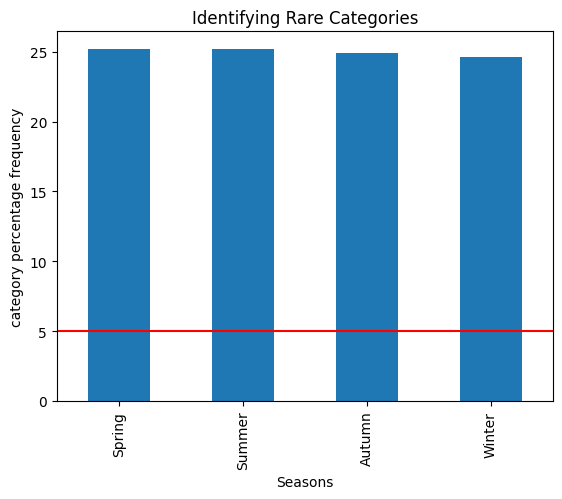

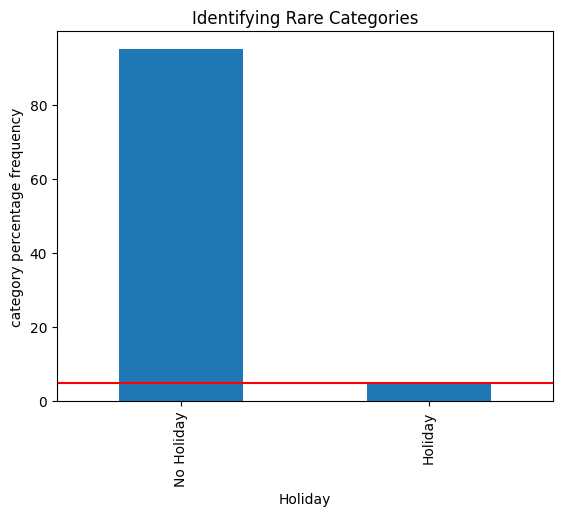

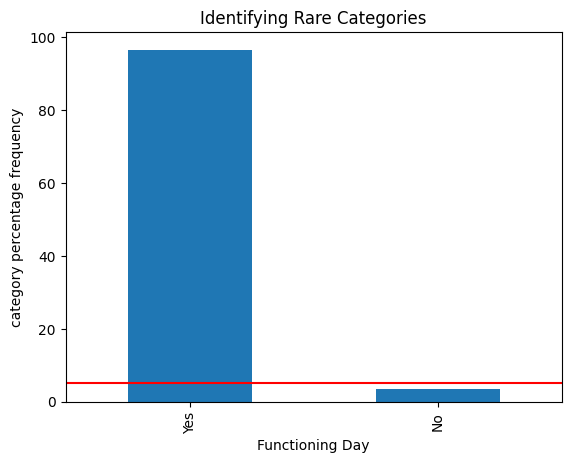

In [91]:
for var in categorical:
  check_rare(var)

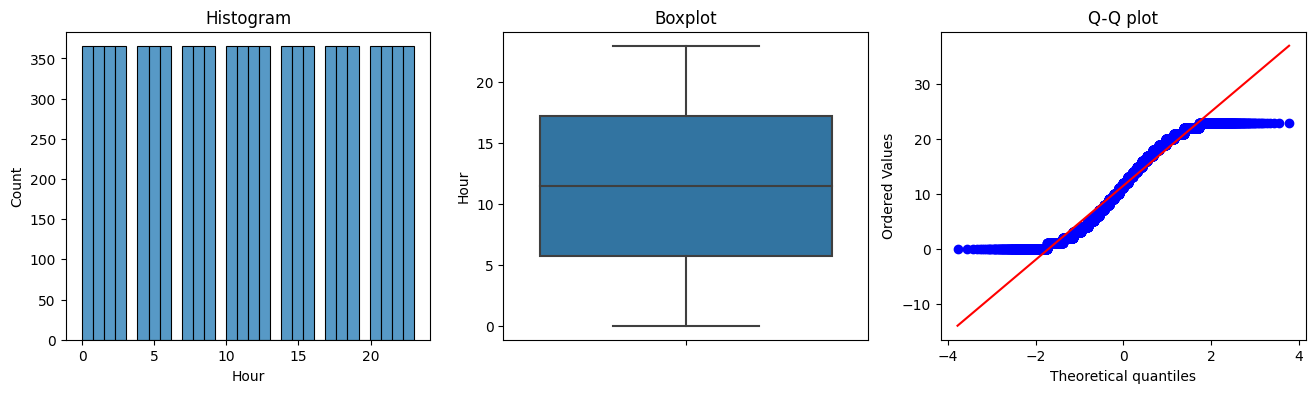

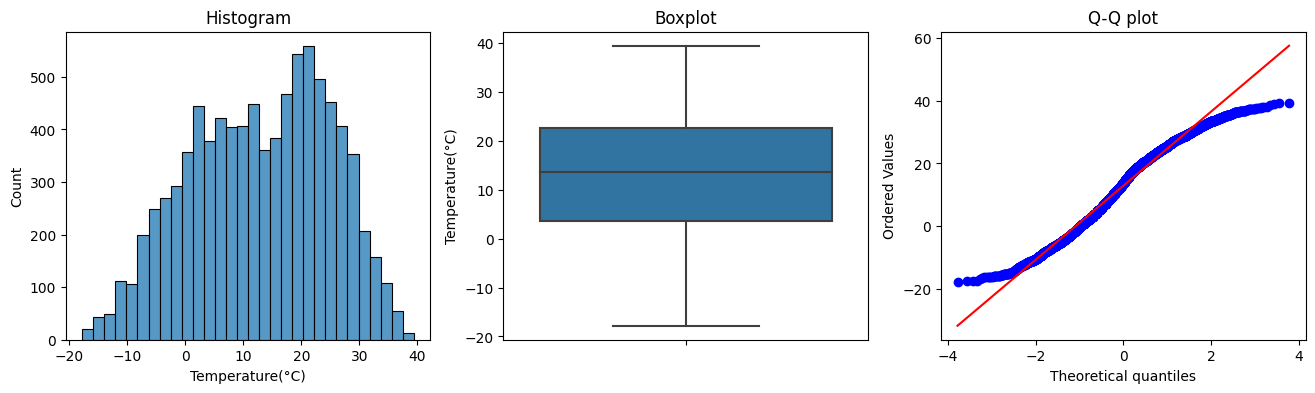

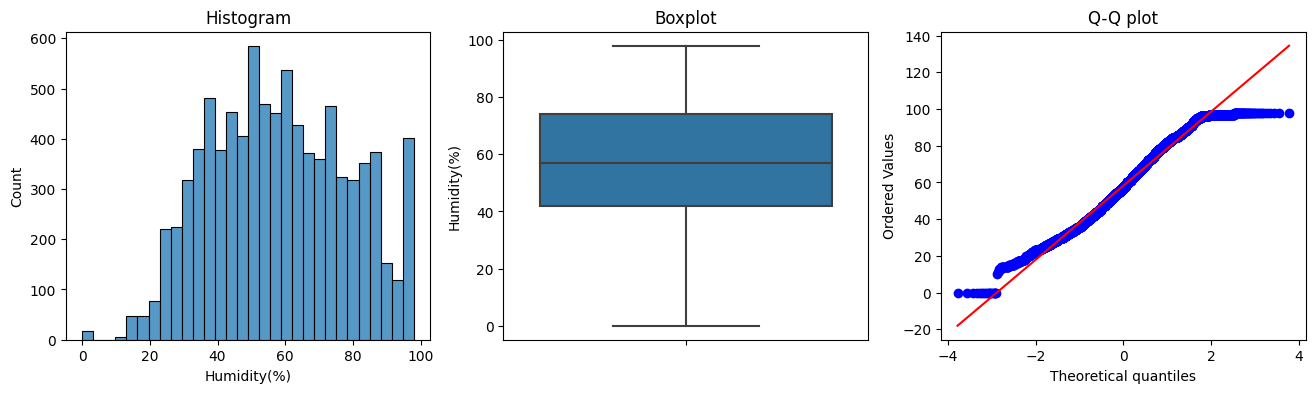

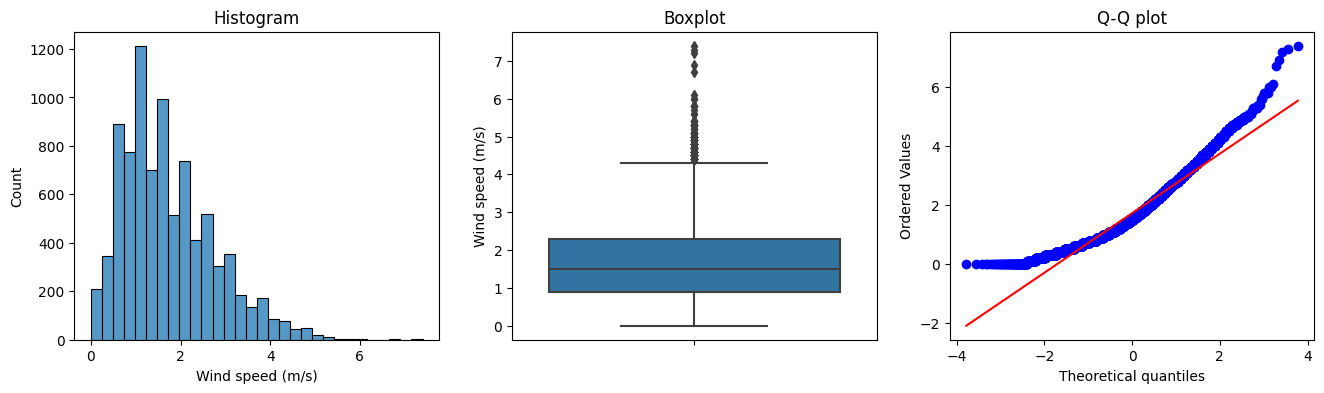

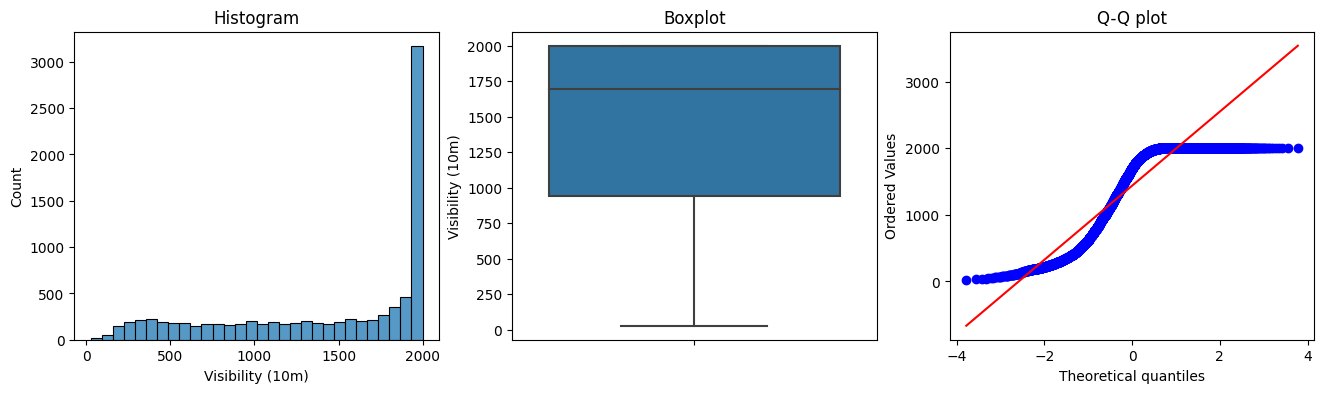

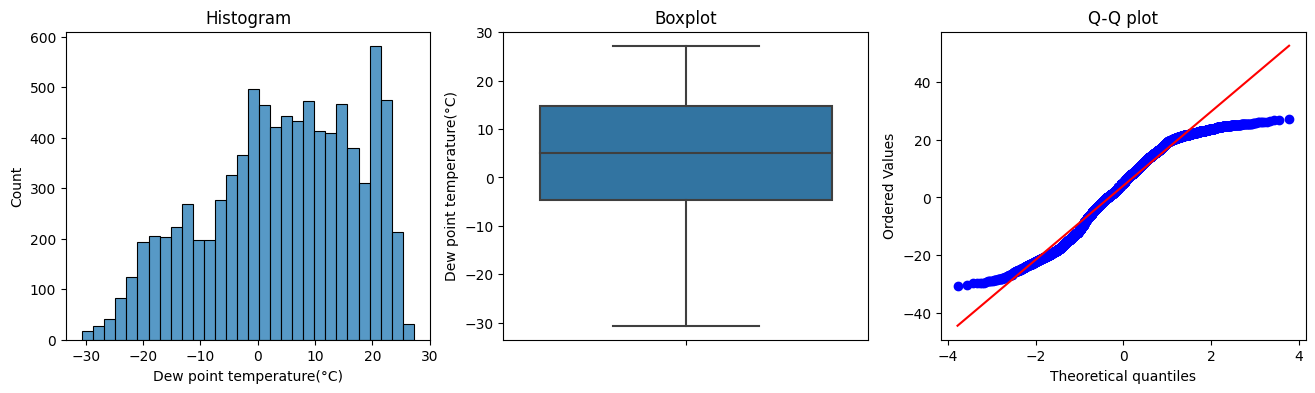

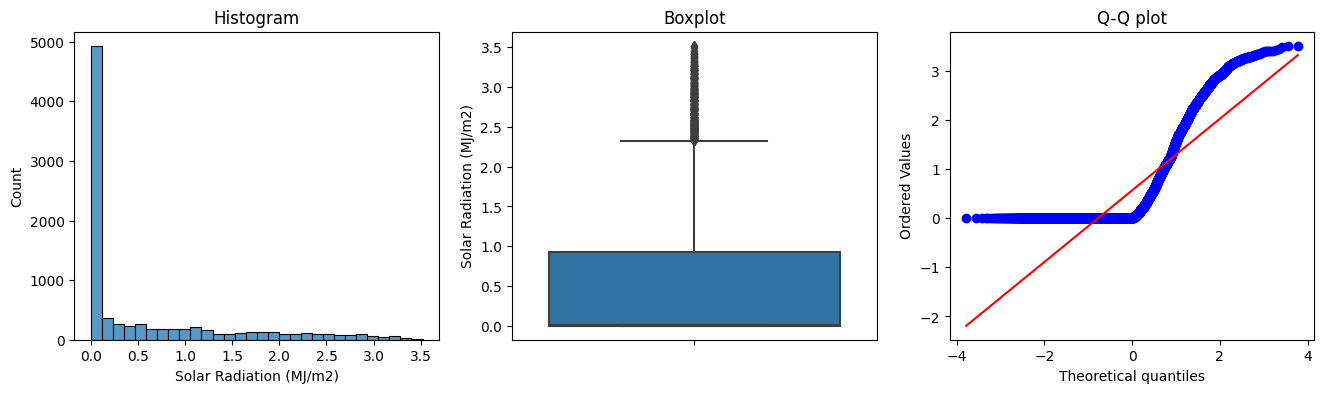

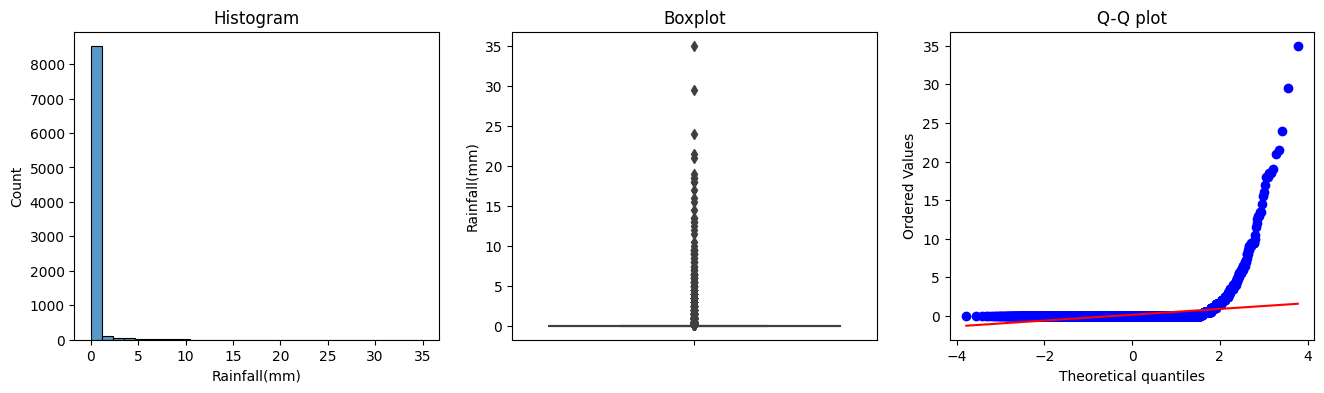

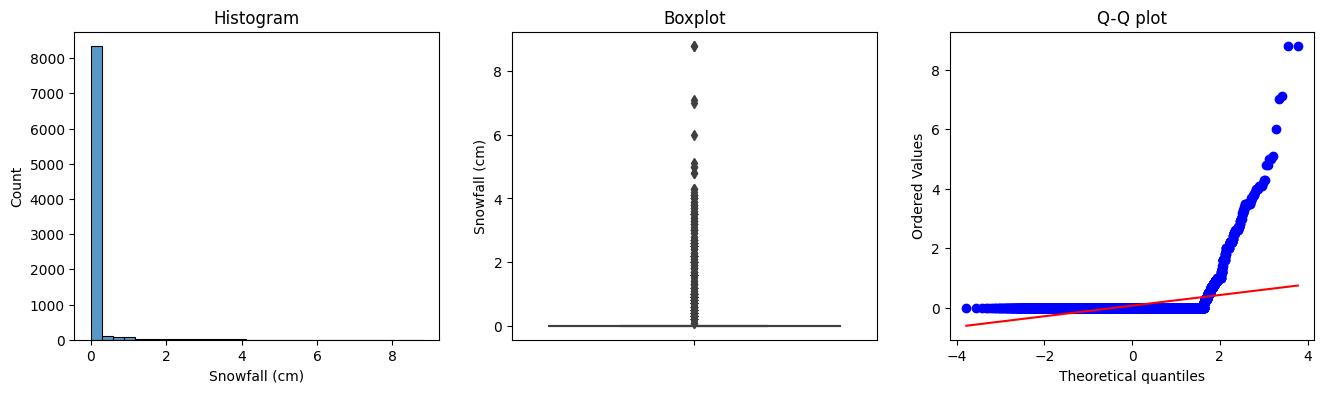

In [92]:
for var in continuous:
    diagnostic_plots(X, var)

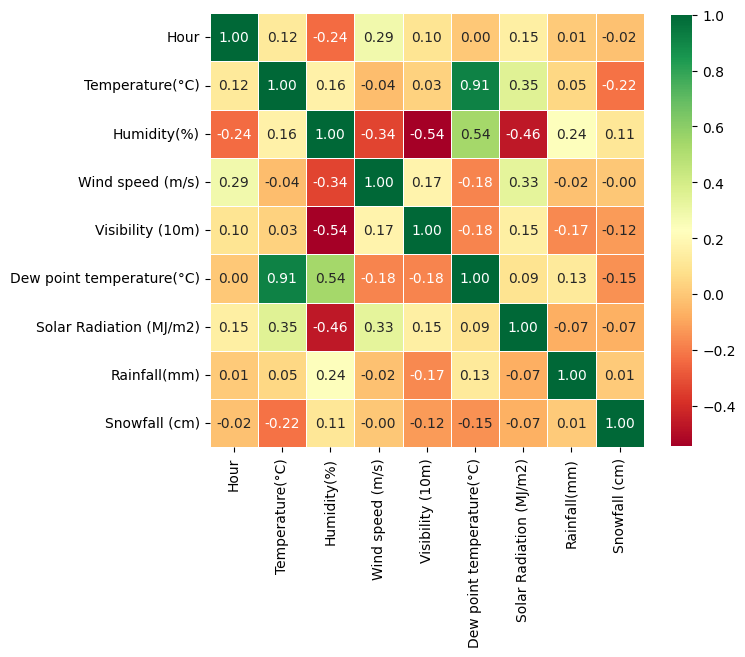

In [93]:
corrmat = X[continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(X[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

## Conclusion from EDA

- We don't have any null/missing values in our dataset, so no need to any imputation techniques.
- We don't have any dupliated values in our dataset, so no need to drop or address them.
- We have 3 categorical variables, 'Seasons', 'Holiday', and 'Functioning Day', out of which, 'Functioning Day' - is rare variable. So we will use OneHotEncoder() for 'Seasons', and 'Holiday'. And RareLabelEncoder() for 'Functioning Day'.
- We have skewed distribution for 'Wind Speed', 'Visibility', 'Solar Radiation', 'Rainfall', and 'Snowfall'.
- We will try and use Yeo Johnson Transformer to convert these distributions, we cannot use Log Transformation as there are some values in those columns which have 0 as values in them, and Log Transformation doesn't work with 0 and negative values.
- We have outliers in 'Wind Speed', 'Solar Radiation', 'Rainfall', 'Snowfall', we will use Winsorization technique to deal with the outliers.
- We have high positive correlation between Temprature and Dew point temprature, so we will drop Dew Point Temprature feature from our model.

## Linear Regression

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [96]:
columns_to_drop = ['Dew point temperature(°C)']
one_hot_encoder_cols = ['Seasons', 'Holiday', 'Functioning Day']
rare_label_encoder_cols = ['Functioning Day']
yeo_transformer_cols = ['Visibility (10m)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

pipeline_2 = Pipeline([
    ('drop_features', DropFeatures(columns_to_drop)),
    ('rare_label_encoder', RareLabelEncoder(tol=0.05, n_categories=2, variables=rare_label_encoder_cols)),
    ('one_hot_encoder', OneHotEncoder(variables = one_hot_encoder_cols, drop_last=True, ignore_format=True)),
    ('yeo_tranformer', YeoJohnsonTransformer(variables=yeo_transformer_cols)),
    ('linearregressor', LinearRegression())
])

In [97]:
param_grid_3 = {
    'linearregressor__fit_intercept': [True, False]
}

random_linear_1 = RandomizedSearchCV(pipeline_2, param_distributions=param_grid_3, cv=5, return_train_score=True)

In [98]:
random_linear_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('drop_features',
                                              DropFeatures(features_to_drop=['Dew '
                                                                             'point '
                                                                             'temperature(°C)'])),
                                             ('rare_label_encoder',
                                              RareLabelEncoder(n_categories=2,
                                                               variables=['Functioning '
                                                                          'Day'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(drop_last=True,
                                                            ignore_format=True,
                                                            variables=['Seasons',
                                                                       'Holiday',
                                                                       'Functioning '
                                                                       'Day'])),
                                             ('yeo_tranformer',
                                              YeoJohnsonTransformer(variables=['Visibility '
                                                                               '(10m)',
                                                                               'Wind '
                                                                               'speed '
                                                                               '(m/s)',
                                                                               'Solar '
                                                                               'Radiation '
                                                                               '(MJ/m2)',
                                                                               'Rainfall(mm)',
                                                                               'Snowfall '
                                                                               '(cm)'])),
                                             ('linearregressor',
                                              LinearRegression())]),
                   param_distributions={'linearregressor__fit_intercept': [True,
                                                                           False]},
                   return_train_score=True)

In [99]:
print(random_linear_1.best_params_)

{'linearregressor__fit_intercept': True}


In [100]:
file_best_estimator_round3 = save_model_folder / 'linear_regressor_round1_best_estimator.pkl'

file_complete_grid_round3 = save_model_folder / 'linear_regressor_round1_complete_grid.pkl'

In [101]:
joblib.dump(random_linear_1.best_estimator_, file_best_estimator_round3)

joblib.dump(random_linear_1, file_complete_grid_round3)

['/content/drive/MyDrive/BUAN6341/HW5/models/machine_learning/linear_regressor_round1_complete_grid.pkl']

In [102]:
loaded_best_estimator_round3 = joblib.load(file_best_estimator_round3)

loaded_complete_grid_round3 = joblib.load(file_complete_grid_round3)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

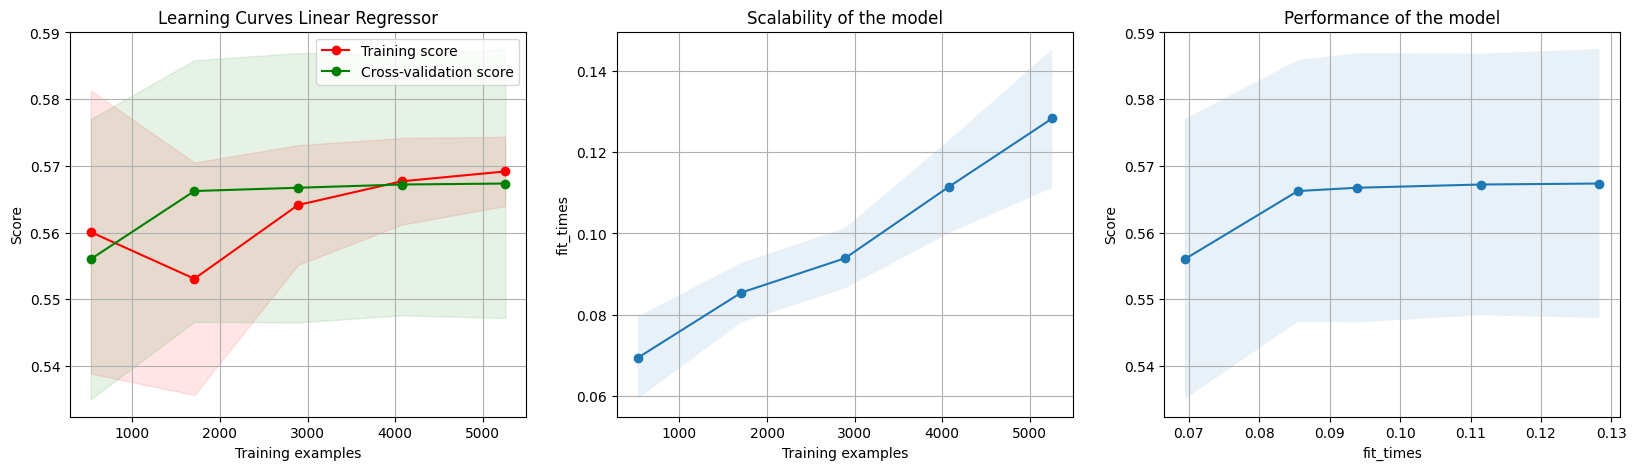

In [103]:
plot_learning_curve(loaded_best_estimator_round3, 'Learning Curves Linear Regressor', X_train, y_train, n_jobs=-1)

In [104]:
print(loaded_best_estimator_round3.score(X_train, y_train))


print(loaded_complete_grid_round3.best_score_)

0.5689963570529926
0.5673467871932847


## Polynomial Regressor

In [121]:
pipeline_3 = Pipeline([
    ('rare_label_encoder', RareLabelEncoder(tol=0.05, n_categories=2, variables=rare_label_encoder_cols)),
    ('one_hot_encoder', OneHotEncoder(variables = one_hot_encoder_cols, drop_last=True, ignore_format=True)),
    ('yeo_tranformer', YeoJohnsonTransformer(variables=yeo_transformer_cols)),
    ('poly', PolynomialFeatures()),
    ('lr', LinearRegression())
])

In [122]:
param_grid_4 = {
    'poly__degree': range(1, 3)
}

random_lr_3 = RandomizedSearchCV(pipeline_3, param_distributions=param_grid_4, cv=5, return_train_score=True)

In [114]:
random_lr_3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rare_label_encoder',
                                              RareLabelEncoder(n_categories=2,
                                                               variables=['Functioning '
                                                                          'Day'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(drop_last=True,
                                                            ignore_format=True,
                                                            variables=['Seasons',
                                                                       'Holiday',
                                                                       'Functioning '
                                                                       'Day'])),
                                             ('yeo_tranformer',
                                              YeoJohnsonTransformer(variables=['Visibility '
                                                                               '(10m)',
                                                                               'Wind '
                                                                               'speed '
                                                                               '(m/s)',
                                                                               'Solar '
                                                                               'Radiation '
                                                                               '(MJ/m2)',
                                                                               'Rainfall(mm)',
                                                                               'Snowfall '
                                                                               '(cm)'])),
                                             ('poly', PolynomialFeatures()),
                                             ('lr', LinearRegression())]),
                   param_distributions={'poly__degree': range(1, 3)},
                   return_train_score=True)

In [115]:
print(random_lr_3.best_params_)

{'poly__degree': 2}


In [116]:
file_best_estimator_round4 = save_model_folder / 'lr_round2_best_estimator.pkl'

file_complete_grid_round4 = save_model_folder / 'lr_round2_complete_grid.pkl'

In [117]:
joblib.dump(random_lr_3.best_estimator_, file_best_estimator_round4)

joblib.dump(random_lr_3, file_complete_grid_round4)

['/content/drive/MyDrive/BUAN6341/HW5/models/machine_learning/lr_round2_complete_grid.pkl']

In [118]:
loaded_best_estimator_round4 = joblib.load(file_best_estimator_round4)

loaded_complete_grid_round4 = joblib.load(file_complete_grid_round4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

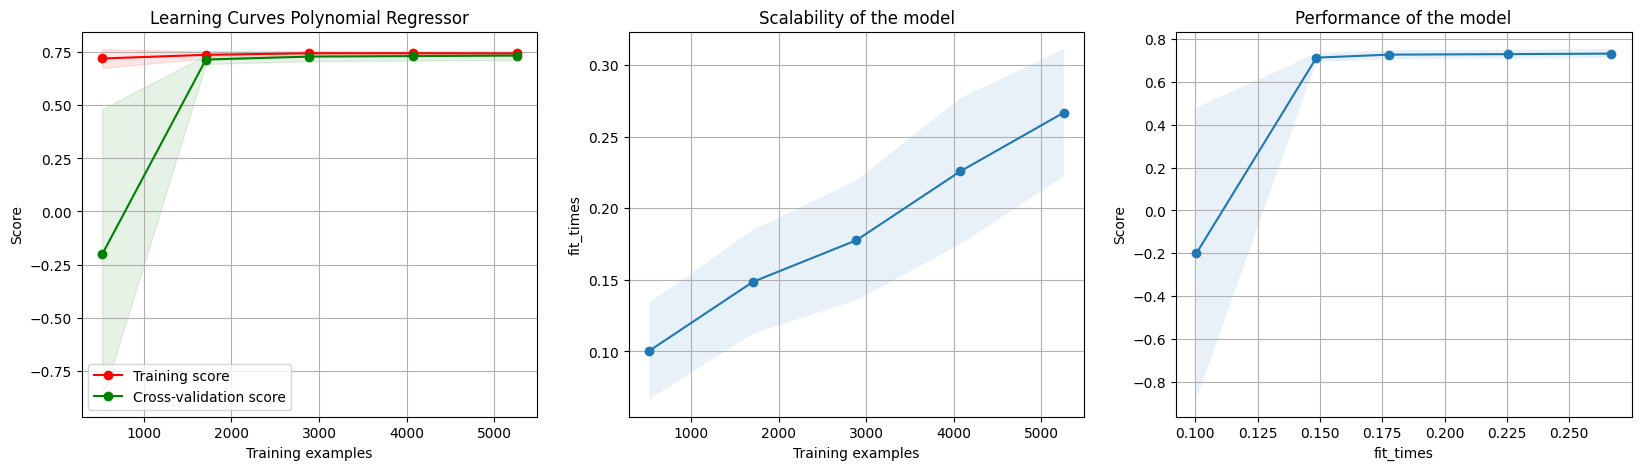

In [119]:
plot_learning_curve(loaded_best_estimator_round4, 'Learning Curves Polynomial Regressor', X_train, y_train, n_jobs=-1)

In [123]:
print(loaded_best_estimator_round4.score(X_train, y_train))


print(loaded_complete_grid_round4.best_score_)

0.7417706145544247
0.7322858798651226


## Ridge Regression

In [125]:
pipeline_4 = Pipeline([
    ('rare_label_encoder', RareLabelEncoder(tol=0.05, n_categories=2, variables=rare_label_encoder_cols)),
    ('one_hot_encoder', OneHotEncoder(variables = one_hot_encoder_cols, drop_last=True, ignore_format=True)),
    ('yeo_tranformer', YeoJohnsonTransformer(variables=yeo_transformer_cols)),
    ('ridge', Ridge())
])

In [126]:
from matplotlib.gridspec import GridSpecFromSubplotSpec
param_grid_5 = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_ridge_1 = GridSearchCV(pipeline_4, param_grid=param_grid_5, cv=5, return_train_score=True)

In [127]:
grid_ridge_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_catego

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(n_categories=2,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(drop_last=True,
                                                      ignore_format=True,
                                                      variables=['Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yeo_tranformer',
                                        YeoJohnsonTransformer(variables=['Visibility '
                                                                         '(10m)',
                                                                         'Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)'])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [129]:
grid_ridge_1.best_params_

{'ridge__alpha': 0.001}

In [130]:
file_best_estimator_round5 = save_model_folder / 'ridge_round1_best_estimator.pkl'

file_complete_grid_round5 = save_model_folder / 'ridge_round1_complete_grid.pkl'

In [131]:
joblib.dump(grid_ridge_1.best_estimator_, file_best_estimator_round5)

joblib.dump(grid_ridge_1, file_complete_grid_round5)

['/content/drive/MyDrive/BUAN6341/HW5/models/machine_learning/ridge_round1_complete_grid.pkl']

In [132]:
loaded_best_estimator_round5 = joblib.load(file_best_estimator_round5)

loaded_complete_grid_round5 = joblib.load(file_complete_grid_round5)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

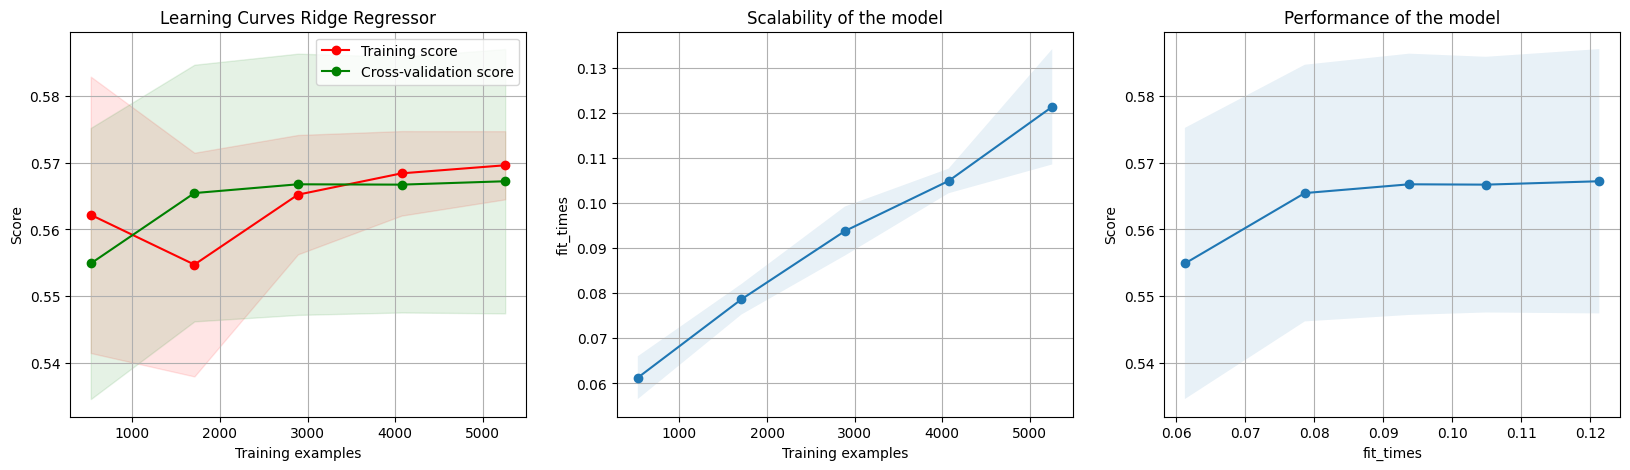

In [133]:
plot_learning_curve(loaded_best_estimator_round5, 'Learning Curves Ridge Regressor', X_train, y_train, n_jobs=-1)

In [134]:
print(loaded_best_estimator_round5.score(X_train, y_train))

print(loaded_complete_grid_round5.best_score_)

0.5694056882866081
0.567224743498526



-  Compare KNN (last HW) and Linear Regression. Basd on your anaysis which algorithm you will recommend.
- The aim of the piepline is to predict the rented bike count.


- Comparing KNN Regressor with Linear Regression, KNN Regressor has a pretty high training score about 86%, and has a cross validation score of about 78%, compared to 56.8% training score and 56.7% cross validation score of linear regression, indicating that there's low or almost no overfitting in case of Linear Regression, but as the score is pretty low, against LinearRegression I would recommend KNN Regressor, as it a pretty good score, even with some overfitting it would end up providing better predictions than LinearRegression.

- When I tried Polynomial Regression on this dataset, I got a much better score of 74% and 73% of training score, as there's very little or no overfitting happening in this case, when compared with KNN I would recommend using Polynomial Regression.

- I also tried Ridge regression, and again the scores are pretty low, of 56.9% and 56.7% of training and cv score resp., I would still recommend using KNN regressor.